### Team Assignment #4 - Data Exploration  
**Author**: Matana Pornluanprasert<br>
**Date** 23 Sep 2024<br>

 **Data Source**: <br>
 Welltory COVID-19 and Wearables Open Data
 https://github.com/Welltory/hrv-covid19/tree/master

In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # for Dimensionality Reduction

# Read the csv file and put it into pandas dataframe
try:
    # Load participants' generic personal data into dataframe
    df_participants = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/participants.csv")

    # Load participants' biometrics data into dataframe
    df_blood_pressure = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/blood_pressure.csv")
    df_heart_rate = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/heart_rate.csv")
    df_hrv_measurements = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/hrv_measurements.csv")
    df_sleep = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/sleep.csv")
    df_wearables = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/wearables.csv")

    # Load weather condition data into dataframe
    df_weather = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/weather.csv")

    # Load participants' survey and corresponding scale description into dataframe
    df_surveys = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/surveys.csv")
    df_scales_description = pd.read_csv("https://raw.githubusercontent.com/Welltory/hrv-covid19/master/data/scales_description.csv")

except Exception as err:
        print(f"Error occurred: {err}")

In [180]:
# Merge df_surveys and df_scales_description, with left join (retain all rows of df_surveys) to get "Description" and "Meaning" in single dataframe (df_scales_description)
df_surveys["scale_value"] = df_surveys["value"].apply(str) 
df_surveys["scale_value"] = df_surveys["scale"] + df_surveys["scale_value"] # Create new column "scale_value" from existing two columns "scale" and "value"

df_scales_description["scale_value"] = df_scales_description["Value"].apply(str)
df_scales_description["scale_value"] = df_scales_description["Scale"] + df_scales_description["scale_value"] # Create new column "scale_value" from existing two columns "Scale" and "Value"

df_surveys_merged = df_surveys.merge(df_scales_description[["scale_value", "Description", "Meaning"]], on = "scale_value", how = "left") # Left join the two dataframe on column "scale_value"

#### **1. Document data context and data sampling in markdown**

In [181]:
# Data Sampling
print("Data Sampling")
print("---------------")

print("\nParticipants' Generic Personal Data")
print(df_participants.sample(n=5))

print("\nParticipants' Biometrics Data: Blood Pressure")
print(df_blood_pressure.sample(n=5))

print("\nParticipants' Biometrics Data: Heart Rate")
print(df_heart_rate.sample(n=5))

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print(df_hrv_measurements.sample(n=5))

print("\nParticipants' Biometrics Data: Sleep Data")
print(df_sleep.sample(n=5))

print("\nParticipants' Biometrics Data: Wearables Data")
print(df_wearables.sample(n=5))

print("\nWeather Condition Data for Participants' Locations")
print(df_weather.sample(n=5))

print("\nParticipants' Survey Data (Original Table with one additional column: scale_value)")
print(df_surveys.sample(n=5))

print("\nScale Description for Survey (Original Table with one additional column: scale_value)")
print(df_scales_description.sample(n=5))

print("\nParticipants' Survey Data (merged with Scale Description)")
print(df_surveys_merged.sample(n=5))

Data Sampling
---------------

Participants' Generic Personal Data
      user_code gender age_range            city        country  height  \
8    05bcfae0a4      m     35-44         Atlanta  United States     NaN   
115  997f44d61a      f     25-34       Krasnodar         Russia  168.00   
144  c9087bbdf7      f     45-54  Fredericksburg  United States  172.72   
166  ebf2c3cb63      f     35-44          Vantaa        Finland  168.00   
77   61a79c730c      f     35-44     Bloomington  United States  167.64   

      weight symptoms_onset  
8     75.977      3/25/2020  
115   50.000       5/2/2020  
144   83.915      3/25/2020  
166   64.000      3/10/2020  
77   102.058      3/30/2020  

Participants' Biometrics Data: Blood Pressure
      user_code  measurement_datetime  diastolic  systolic  \
319  a1c2e6b2eb  2020-04-19  09:37:51         90       133   
298  a1c2e6b2eb  2020-04-07  04:56:28         88       131   
242  a1c2e6b2eb  2020-03-06  05:15:03         87       122   
450  a1

#### **Data Context and Data Sampling**

This Covid-19 and wearables data was collected in 2020 by Welltory team from participants with positive Covid-19. It comprises of health conditions of participants, including blood pressure, heart rate, HRV measurement, sleep data, wearables data, survey of symptoms, plus weather condition and participants' generic personal data. The team uses multiple devices for data collection, such as bluetooth-enabled heart rate monitor, smart phone camera, Apple Watch, and Garmin.<br>

Based on sample data, we found that there are several missing data, and we will handle them later.<br>
***

#### **2. Explore and interpret data structure, descriptive statistics, data quality, and variable relationships**

In [182]:
# Data Structure
print("\nData Structure")
print("---------------")

print("\nParticipants' Generic Personal Data")
print(f"Dimensions: {df_participants.shape}")
print(f"Data Types:\n{df_participants.dtypes}")
print(f"Missing Values:\n{df_participants.isnull().sum()}")

print("\nParticipants' Biometrics Data: Blood Pressure")
print(f"Dimensions: {df_blood_pressure.shape}")
print(f"Data Types:\n{df_blood_pressure.dtypes}")
print(f"Missing Values:\n{df_blood_pressure.isnull().sum()}")

print("\nParticipants' Biometrics Data: Heart Rate")
print(f"Dimensions: {df_heart_rate.shape}")
print(f"Data Types:\n{df_heart_rate.dtypes}")
print(f"Missing Values:\n{df_heart_rate.isnull().sum()}")

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print(f"Dimensions: {df_hrv_measurements.shape}")
print(f"Data Types:\n{df_hrv_measurements.dtypes}")
print(f"Missing Values:\n{df_hrv_measurements.isnull().sum()}")

print("\nParticipants' Biometrics Data: Sleep Data")
print(f"Dimensions: {df_sleep.shape}")
print(f"Data Types:\n{df_sleep.dtypes}")
print(f"Missing Values:\n{df_sleep.isnull().sum()}")

print("\nParticipants' Biometrics Data: Wearables Data")
print(f"Dimensions: {df_wearables.shape}")
print(f"Data Types:\n{df_wearables.dtypes}")
print(f"Missing Values:\n{df_wearables.isnull().sum()}")

print("\nWeather Condition Data for Participants' Locations")
print(f"Dimensions: {df_weather.shape}")
print(f"Data Types:\n{df_weather.dtypes}")
print(f"Missing Values:\n{df_weather.isnull().sum()}")

print("\nParticipants' Survey Data (Original Table)")
print(f"Dimensions: {df_surveys.shape}")
print(f"Data Types:\n{df_surveys.dtypes}")
print(f"Missing Values:\n{df_surveys.isnull().sum()}")

print("\nScale Description for Survey")
print(f"Dimensions: {df_scales_description.shape}")
print(f"Data Types:\n{df_scales_description.dtypes}")
print(f"Missing Values:\n{df_scales_description.isnull().sum()}")

print("\nParticipants' Survey Data (merged with Scale Description)")
print(f"Dimensions: {df_surveys_merged.shape}")
print(f"Data Types:\n{df_surveys_merged.dtypes}")
print(f"Missing Values:\n{df_surveys_merged.isnull().sum()}")


Data Structure
---------------

Participants' Generic Personal Data
Dimensions: (185, 8)
Data Types:
user_code          object
gender             object
age_range          object
city               object
country            object
height            float64
weight            float64
symptoms_onset     object
dtype: object
Missing Values:
user_code          0
gender             0
age_range          0
city              12
country            6
height             2
weight             0
symptoms_onset    38
dtype: int64

Participants' Biometrics Data: Blood Pressure
Dimensions: (721, 8)
Data Types:
user_code                    object
measurement_datetime         object
diastolic                     int64
systolic                      int64
functional_changes_index    float64
circulatory_efficiency      float64
kerdo_vegetation_index      float64
robinson_index              float64
dtype: object
Missing Values:
user_code                     0
measurement_datetime          0
diastolic        

#### **Interpretation of Data Structure**

There are 185 patients with positive Covid-19 participating in this research, each with unique user_code assigned. Personal data [gender, age range, city, country, height (float), weight (float), and symptoms onset] are collected; however some personal data (city, country, height, and symtoms onset) are missing.<br>

Participants' biometric data [blood pressure, heart rate, HRV measurements, sleep data, wearables data] are mostly numeric, either in float or integer, except for some tags which are string. These are collected for each participant (user_code) and day/time of measurement or recording. While multiple biometric data are complete (no missing), there are some missings in:<br>

- **Blood Pressure**: functional_changes_index, circulatory_efficiency, kerdo_vegetation_index, robinson_index 
- **HRV Measurements**: how_sleep, tags 
- **Sleep Data**: sleep_awake_duration, sleep_rem_duration, sleep_light_duration, sleep_deep_duration, pulse_min, pulse_max, pulse_average
- **Wearables Data**: all columns except user_code and day

Weather Data contains weather conditions (temperature, atmospheric pressure, precipitation, humidity, and clouds, all in float) for participants' location in certain days. This data is complete and no missing.<br>

Survey Data are health-related survey results collected from Welltory app. Each scale are recorded in integer, with corresponding scale description, meaning, and text interpretation of user's results. These are collected for each participant (user_code) and date of survey taken.<br>

In [183]:
# Descriptive Statistics
print("\nDescriptive Statistics")
print("----------------------")

print("\nParticipants' Generic Personal Data")
print("----------------------")
numeric_columns1 = df_participants.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_participants[numeric_columns1].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_participants[numeric_columns1].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_participants[numeric_columns1].skew())
print("Kurtosis:")
print(df_participants[numeric_columns1].kurt())

print("\nParticipants' Biometrics Data: Blood Pressure")
print("----------------------")
numeric_columns2 = df_blood_pressure.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_blood_pressure[numeric_columns2].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_blood_pressure[numeric_columns2].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_blood_pressure[numeric_columns2].skew())
print("Kurtosis:")
print(df_blood_pressure[numeric_columns2].kurt())

print("\nParticipants' Biometrics Data: Heart Rate")
print("----------------------")
numeric_columns3 = df_heart_rate.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_heart_rate[numeric_columns3].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_heart_rate[numeric_columns3].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_heart_rate[numeric_columns3].skew())
print("Kurtosis:")
print(df_heart_rate[numeric_columns3].kurt())

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print("----------------------")
numeric_columns4 = df_hrv_measurements.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_hrv_measurements[numeric_columns4].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_hrv_measurements[numeric_columns4].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_hrv_measurements[numeric_columns4].skew())
print("Kurtosis:")
print(df_hrv_measurements[numeric_columns4].kurt())

print("\nParticipants' Biometrics Data: Sleep Data")
print("----------------------")
numeric_columns5 = df_sleep.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_sleep[numeric_columns5].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_sleep[numeric_columns5].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_sleep[numeric_columns5].skew())
print("Kurtosis:")
print(df_sleep[numeric_columns5].kurt())

print("\nParticipants' Biometrics Data: Wearables Data")
print("----------------------")
numeric_columns6 = df_wearables.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_wearables[numeric_columns6].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_wearables[numeric_columns6].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_wearables[numeric_columns6].skew())
print("Kurtosis:")
print(df_wearables[numeric_columns6].kurt())

print("\nWeather Condition Data for Participants' Locations")
print("----------------------")
numeric_columns7 = df_weather.select_dtypes(include=[np.number]).columns
print("Central Tendency Measures:")
print(df_weather[numeric_columns7].describe().loc[['mean', '50%']])
print("\nDispersion Measures:")
print(df_weather[numeric_columns7].describe().loc[['std', 'min', 'max']])
print("\nDistribution Measures:")
print("Skewness:")
print(df_weather[numeric_columns7].skew())
print("Kurtosis:")
print(df_weather[numeric_columns7].kurt())


Descriptive Statistics
----------------------

Participants' Generic Personal Data
----------------------
Central Tendency Measures:
          height     weight
mean  169.976393  77.927757
50%   168.000000  74.344000

Dispersion Measures:
         height      weight
std   12.400103   19.552541
min  132.080000   43.500000
max  250.000000  154.221000

Distribution Measures:
Skewness:
height    2.910275
weight    0.865345
dtype: float64
Kurtosis:
height    17.552808
weight     0.891368
dtype: float64

Participants' Biometrics Data: Blood Pressure
----------------------
Central Tendency Measures:
      diastolic    systolic  functional_changes_index  circulatory_efficiency  \
mean  81.228849  119.441054                  2.594013             2735.197057   
50%   82.000000  120.000000                  2.580000             2640.000000   

      kerdo_vegetation_index  robinson_index  
mean              -15.498233       84.663779  
50%               -17.000000       83.220000  

Dispersion Me

In [184]:
# Descriptive Statistics for Survey Data
print("\nParticipants' Survey Data")
print("----------------------")

# Create a new dataframe (df_scale_list) representing unique list of scales
df_scale_list = df_surveys["scale"].drop_duplicates()
print(f"Number of scales: {df_scale_list.shape}")

# Iterate over list of scales and calculate key statistics for each scale
counter = 0
for current_scale in df_scale_list:
    counter += 1
    print(f"\nScale {counter} : {current_scale}")

    df_current_scale = df_surveys[df_surveys["scale"] == current_scale]
    print("Central Tendency Measures:")
    print(df_current_scale["value"].describe().loc[['mean', '50%']])
    print("Dispersion Measures:")
    print(df_current_scale["value"].describe().loc[['std', 'min', 'max']])
    print("Distribution Measures:")
    print("Skewness:")
    print(df_current_scale["value"].skew())
    print("Kurtosis:")
    print(df_current_scale["value"].kurt())



Participants' Survey Data
----------------------
Number of scales: (58,)

Scale 1 : S_CORONA
Central Tendency Measures:
mean    2.430233
50%     2.000000
Name: value, dtype: float64
Dispersion Measures:
std    1.385137
min    1.000000
max    5.000000
Name: value, dtype: float64
Distribution Measures:
Skewness:
0.9230667635030788
Kurtosis:
-0.5418335978820465

Scale 2 : S_COVID_BLUISH
Central Tendency Measures:
mean    1.270936
50%     1.000000
Name: value, dtype: float64
Dispersion Measures:
std    0.873421
min    1.000000
max    6.000000
Name: value, dtype: float64
Distribution Measures:
Skewness:
3.899771508017594
Kurtosis:
15.714855059523975

Scale 3 : S_COVID_BREATH
Central Tendency Measures:
mean    2.312195
50%     2.000000
Name: value, dtype: float64
Dispersion Measures:
std    1.389773
min    1.000000
max    6.000000
Name: value, dtype: float64
Distribution Measures:
Skewness:
0.7980178314680587
Kurtosis:
-0.282369940462444

Scale 4 : S_COVID_CONFUSION
Central Tendency Measure

#### **Interpretation of Descriptive Statistics**

The mean and median are given here to represent the central location of the data, which are mostly biometrics measurements and weather conditions, while standard deviation, min and max help us understand more about the range and spread of data. Skewness indicate if it is right skew (positive), left skew (negative), or symmetric (0). Kurtosis helps us understand the tailedness of the data distribution (close to zero: normal distribution; higher values: heavier tails)<br>

For example, average (mean) body temperature of the participants is 36.40 and median is approximately the same, so the body temperatue may have symmetric distribution. It ranges from 35.8 to 36.9, with standard deviation of 0.24. It is left skew (-0.21) and based on the kurtosis (-0.43), we may assume that it is likely to be normal distribution.<br>

For the survey, many scales are given by the participants in assigned integer value, hence extra attention is required for the interpretation of the key statistics of the survey.<br>

Features with skewness and kurtosis between -2 to +2, which may indicate that they may be Gaussian-like<br>
- **Participants' Generic Personal Data**: weight
- **Blood Pressure**: systolic, functional_changes_index, kerdo_vegetation_index
- **Heart Rate**: heart_rate
- **HRV Measurements**: bpm, meanrr, mode, amo (for how_feel and how_sleep, there are only 5 possible assigned discrete value, ranging from -2 to 2, so they should not considered to be Gaussian-like)
- **Sleep Data**: sleep_duration, sleep_rem_duration, sleep_light_duration, sleep_deep_duration (however, the last three came from only 3 users, so it may actually not be Gaussian-like)
- **Wearables Data**: resting_pulse, pulse_average, pulse_min, pulse_max, average_spo2_value, body_temperature_avg, stand_hours_total, active_calories_burned, basal_calories_burned, average_headphone_exposure

In [185]:
# Data Quality
print("\nData Quality")
print("------------")

print("\nParticipants' Generic Personal Data")
print("------------")
print(f"Duplicated Rows: {df_participants.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_participants.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Blood Pressure")
print("------------")
print(f"Duplicated Rows: {df_blood_pressure.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_blood_pressure.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Heart Rate")
print("------------")
print(f"Duplicated Rows: {df_heart_rate.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_heart_rate.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print("------------")
print(f"Duplicated Rows: {df_hrv_measurements.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_hrv_measurements.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Sleep Data")
print("------------")
print(f"Duplicated Rows: {df_sleep.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_sleep.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Biometrics Data: Wearables Data")
print("------------")
print(f"Duplicated Rows: {df_wearables.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_wearables.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nWeather Condition Data for Participants' Locations")
print("------------")
print(f"Duplicated Rows: {df_weather.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_weather.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))

print("\nParticipants' Survey Data (merged with Scale Description)")
print("------------")
print(f"Duplicated Rows: {df_surveys_merged.duplicated().sum()}")
print("Checking for Inconsistent Values:")
print(df_surveys_merged.apply(lambda x: x.value_counts().index[0]).to_frame('most_frequent_value'))


Data Quality
------------

Participants' Generic Personal Data
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
               most_frequent_value
user_code               007b8190cf
gender                           f
age_range                    35-44
city                        Moscow
country                     Russia
height                       168.0
weight                        60.0
symptoms_onset            5/6/2020

Participants' Biometrics Data: Blood Pressure
------------
Duplicated Rows: 0
Checking for Inconsistent Values:
                           most_frequent_value
user_code                           a1c2e6b2eb
measurement_datetime      2020-05-10  21:27:56
diastolic                                   80
systolic                                   122
functional_changes_index                  2.56
circulatory_efficiency                  3150.0
kerdo_vegetation_index                   -32.0
robinson_index                            73.2

Participants' Biom

#### **Interpretation of Data Quality**

Duplicated Rows: There is no duplicated rows in the dataset.<br>

Inconsistent Values: Most frequent values are shown here for each column to help identify inconsistencies or anomalies. Based on most frequent values, there is no potential inconsistencies or anomalies.<br>


Variable Relationships
----------------------

Participants' Biometrics Data: Blood Pressure
----------------------
Correlation Matrix:
                          diastolic  systolic  functional_changes_index  \
diastolic                  1.000000  0.581326                  0.642446   
systolic                   0.581326  1.000000                  0.681542   
functional_changes_index   0.642446  0.681542                  1.000000   
circulatory_efficiency    -0.210696  0.571077                  0.438337   
kerdo_vegetation_index    -0.508497 -0.383702                  0.010715   
robinson_index             0.395594  0.481670                  0.786682   

                          circulatory_efficiency  kerdo_vegetation_index  \
diastolic                              -0.210696               -0.508497   
systolic                                0.571077               -0.383702   
functional_changes_index                0.438337                0.010715   
circulatory_efficiency           

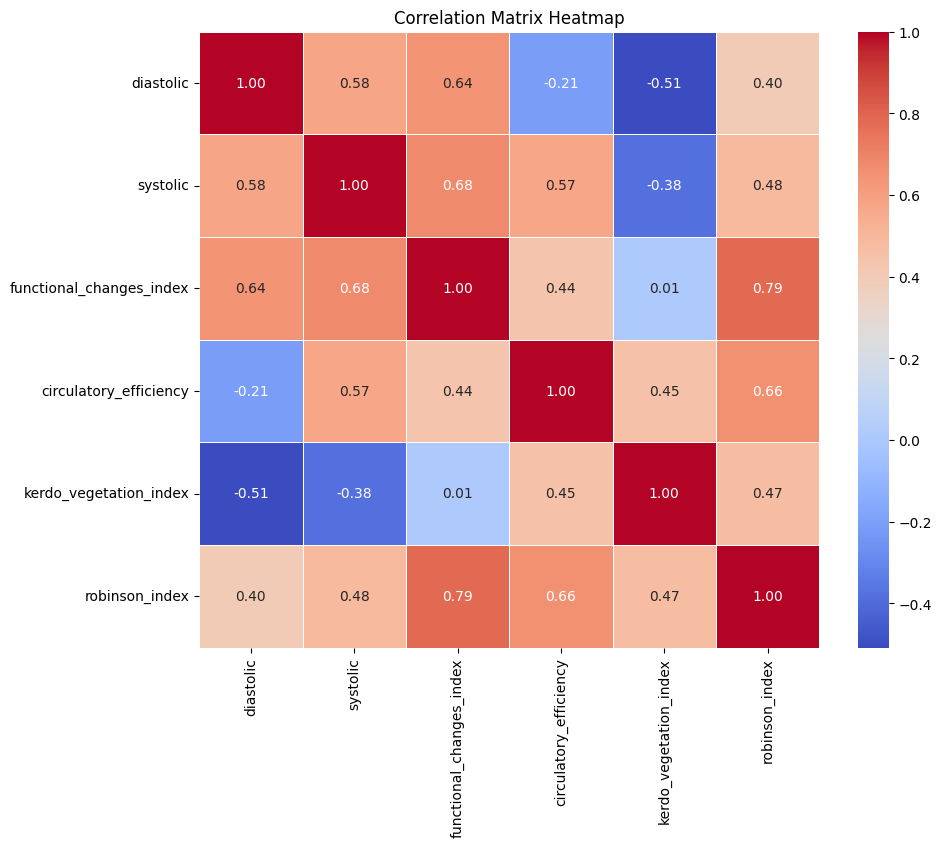


Participants' Biometrics Data: Heart Rate Variability (HRV) Measurements
----------------------
Correlation Matrix:
                  bpm    meanrr     mxdmn      sdnn     rmssd     pnn50  \
bpm          1.000000 -0.977724 -0.343935 -0.341514 -0.214339 -0.408006   
meanrr      -0.977724  1.000000  0.348015  0.348052  0.231696  0.445640   
mxdmn       -0.343935  0.348015  1.000000  0.954639  0.846259  0.777242   
sdnn        -0.341514  0.348052  0.954639  1.000000  0.909046  0.810236   
rmssd       -0.214339  0.231696  0.846259  0.909046  1.000000  0.843065   
pnn50       -0.408006  0.445640  0.777242  0.810236  0.843065  1.000000   
mode        -0.956984  0.979400  0.262628  0.258114  0.128843  0.361014   
amo          0.547373 -0.533668 -0.750213 -0.759049 -0.595028 -0.718982   
lf          -0.171505  0.176511  0.717783  0.743380  0.629966  0.558850   
hf          -0.105204  0.128630  0.740832  0.773958  0.857374  0.727759   
vlf         -0.240630  0.242066  0.491447  0.489891  0.274

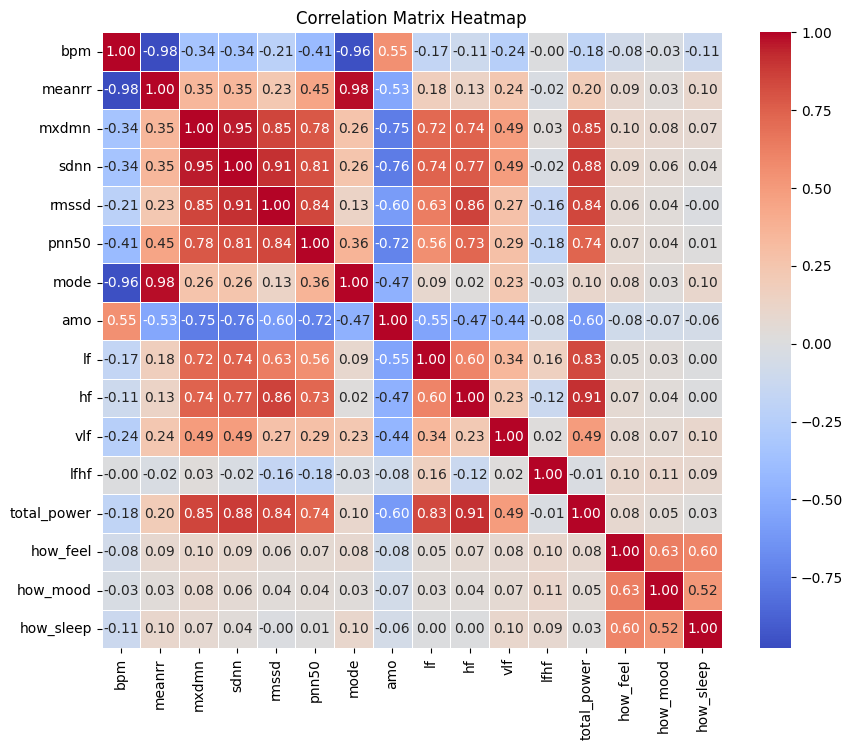


Participants' Biometrics Data: Sleep Data
----------------------
Correlation Matrix:
                      sleep_duration  sleep_awake_duration  \
sleep_duration              1.000000             -0.176436   
sleep_awake_duration       -0.176436              1.000000   
sleep_rem_duration          0.962985             -0.382577   
sleep_light_duration        0.409195              0.466358   
sleep_deep_duration         0.551536              0.283719   
pulse_min                   0.286882             -0.937728   
pulse_max                   0.542304             -0.999860   
pulse_average               0.243608             -0.935125   

                      sleep_rem_duration  sleep_light_duration  \
sleep_duration                  0.962985              0.409195   
sleep_awake_duration           -0.382577              0.466358   
sleep_rem_duration              1.000000              0.754172   
sleep_light_duration            0.754172              1.000000   
sleep_deep_duration      

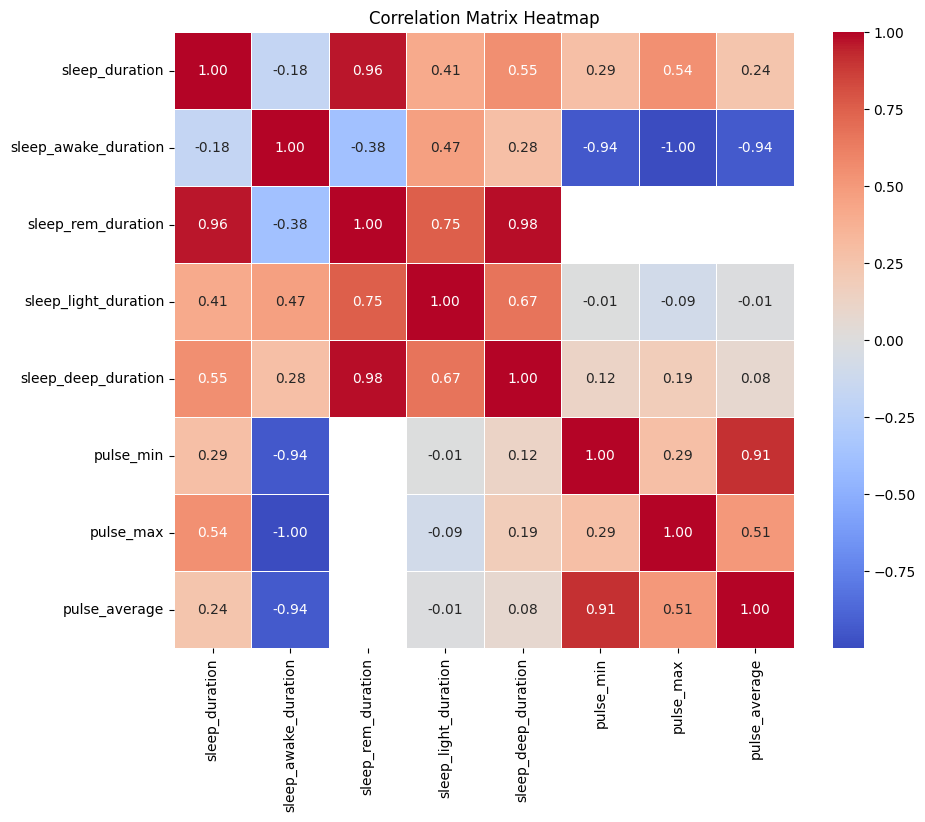


Participants' Biometrics Data: Wearables Data
----------------------
Correlation Matrix:
                                 resting_pulse  pulse_average  pulse_min  \
resting_pulse                         1.000000       0.338089   0.840694   
pulse_average                         0.338089       1.000000   0.315410   
pulse_min                             0.840694       0.315410   1.000000   
pulse_max                            -0.227967       0.663218  -0.328660   
average_spo2_value                    0.235886      -0.056980   0.127899   
body_temperature_avg                 -0.156849      -0.027397   0.027742   
stand_hours_total                    -0.078295       0.196996  -0.133089   
steps_count                          -0.122994       0.130591  -0.120087   
distance                             -0.159283       0.134463  -0.194156   
steps_speed                           0.125197      -0.010898   0.042564   
total_number_of_flights_climbed      -0.292782      -0.069213  -0.280784  

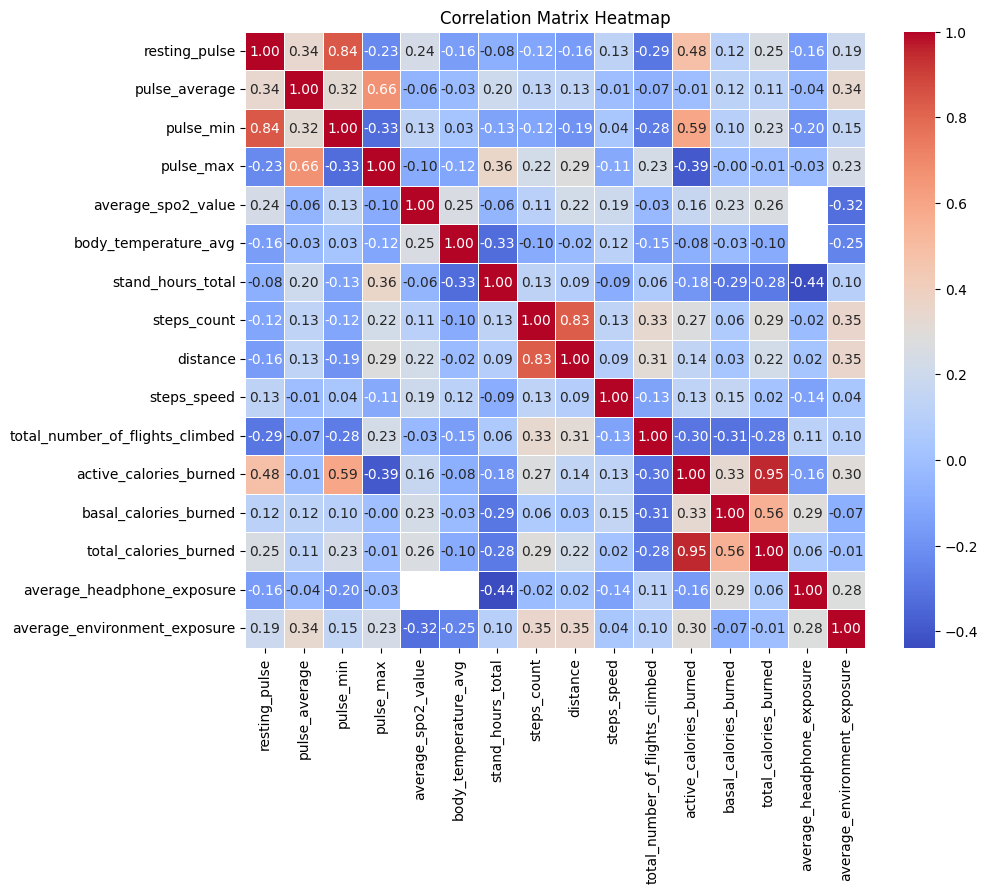


Weather Condition Data for Participants' Locations
----------------------
Correlation Matrix:
                      avg_temperature_C  atmospheric_pressure  \
avg_temperature_C              1.000000             -0.002708   
atmospheric_pressure          -0.002708              1.000000   
precip_intensity               0.030620             -0.145488   
humidity                      -0.449895             -0.112873   
clouds                        -0.155868             -0.288340   

                      precip_intensity  humidity    clouds  
avg_temperature_C             0.030620 -0.449895 -0.155868  
atmospheric_pressure         -0.145488 -0.112873 -0.288340  
precip_intensity              1.000000  0.230269  0.209718  
humidity                      0.230269  1.000000  0.399211  
clouds                        0.209718  0.399211  1.000000  


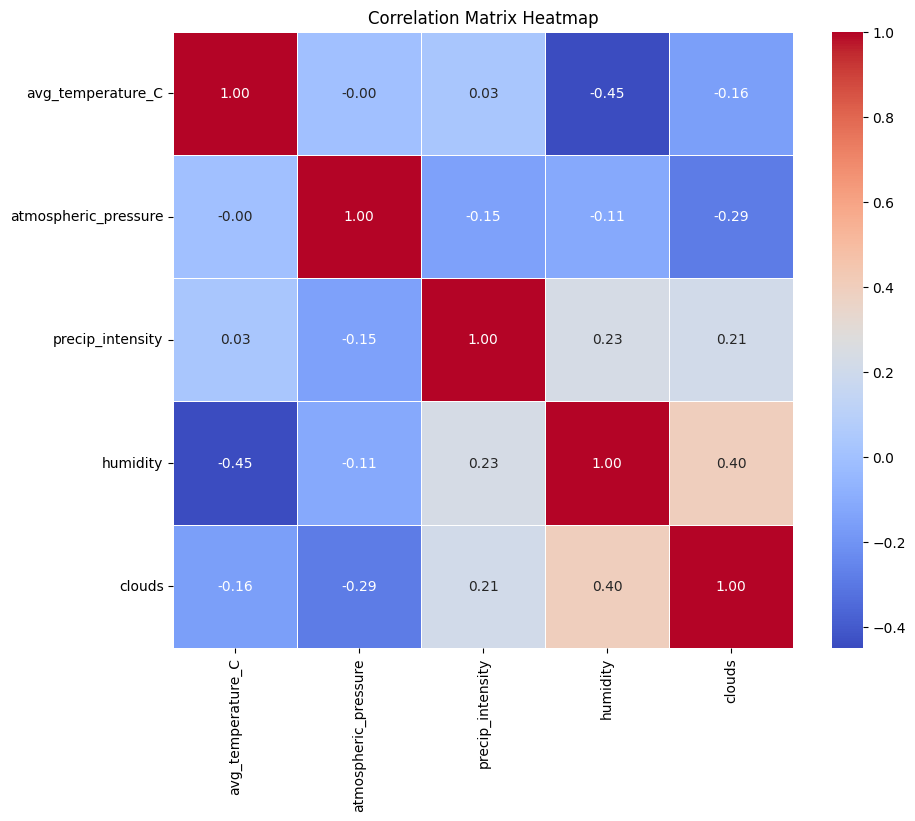

In [186]:
# Variable Relationships
print("\nVariable Relationships")
print("----------------------")

print("\nParticipants' Biometrics Data: Blood Pressure")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix2 = df_blood_pressure[numeric_columns2].corr()
print(correlation_matrix2)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix4 = df_hrv_measurements[numeric_columns4].corr()
print(correlation_matrix4)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix4, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nParticipants' Biometrics Data: Sleep Data")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix5 = df_sleep[numeric_columns5].corr()
print(correlation_matrix5)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix5, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nParticipants' Biometrics Data: Wearables Data")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix6 = df_wearables[numeric_columns6].corr()
print(correlation_matrix6)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix6, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

print("\nWeather Condition Data for Participants' Locations")
print("----------------------")
print("Correlation Matrix:")
correlation_matrix7 = df_weather[numeric_columns7].corr()
print(correlation_matrix7)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix7, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

#### **Interpretation of Variable Relationships**

**Blood Pressure:**<br>
Quite high positive correlation (0.79) between functional_changes_index and robinson_index

**HRV Measurements:**<br>
High positive correlation (>=0.80) between<br>
- mxdmn <> sdnn
- mxdmn <> rmssd
- mxdmn <> total_power
- sdnn <> rmssd
- sdnn <> pnn50
- sdnn <> total_power
- rmssd <> pnn50
- rmssd <> hf
- rmssd <> total_power
- mode <> meanrr
- lf <> total_power
- hf <> total_power

High negative correlation (<=-0.80) between<br>
- bpm <> meanrr
- bpm <> mode

**Sleep Data:**<br>
High positive correlation (>=0.80) between<br>
- sleep_duration <> sleep_rem_duration
- sleep_rem_duration <> sleep_deep_duration
- pulse_min <> pulse_average

High negative correlation (<=-0.80) between<br>
- sleep_awake_duration <> pulse_min
- sleep_awake_duration <> pulse_average

**Wearables Data:**<br>
- High positive correlation (>=0.80) between<br>
- resting_pulse <> pulse_min
- steps_counnt <> distance
- active_calories_burned <> total_calories_burned

**Weather Data:**<br>
No significant correlation in weather variables.<br>

Those variable pairs with high positive correlation suggests that as one variable in the pair increases, another should also tend to increase.
In contrast, variable pairs with high negative correlation suggests that as one variable in the pair increases, another tends to decrease.<br>
***

#### **3. Explore data visually with appropriate visualizations**


Data Visualization
----------------------

Participants' Generic Personal Data


<function matplotlib.pyplot.show(close=None, block=None)>

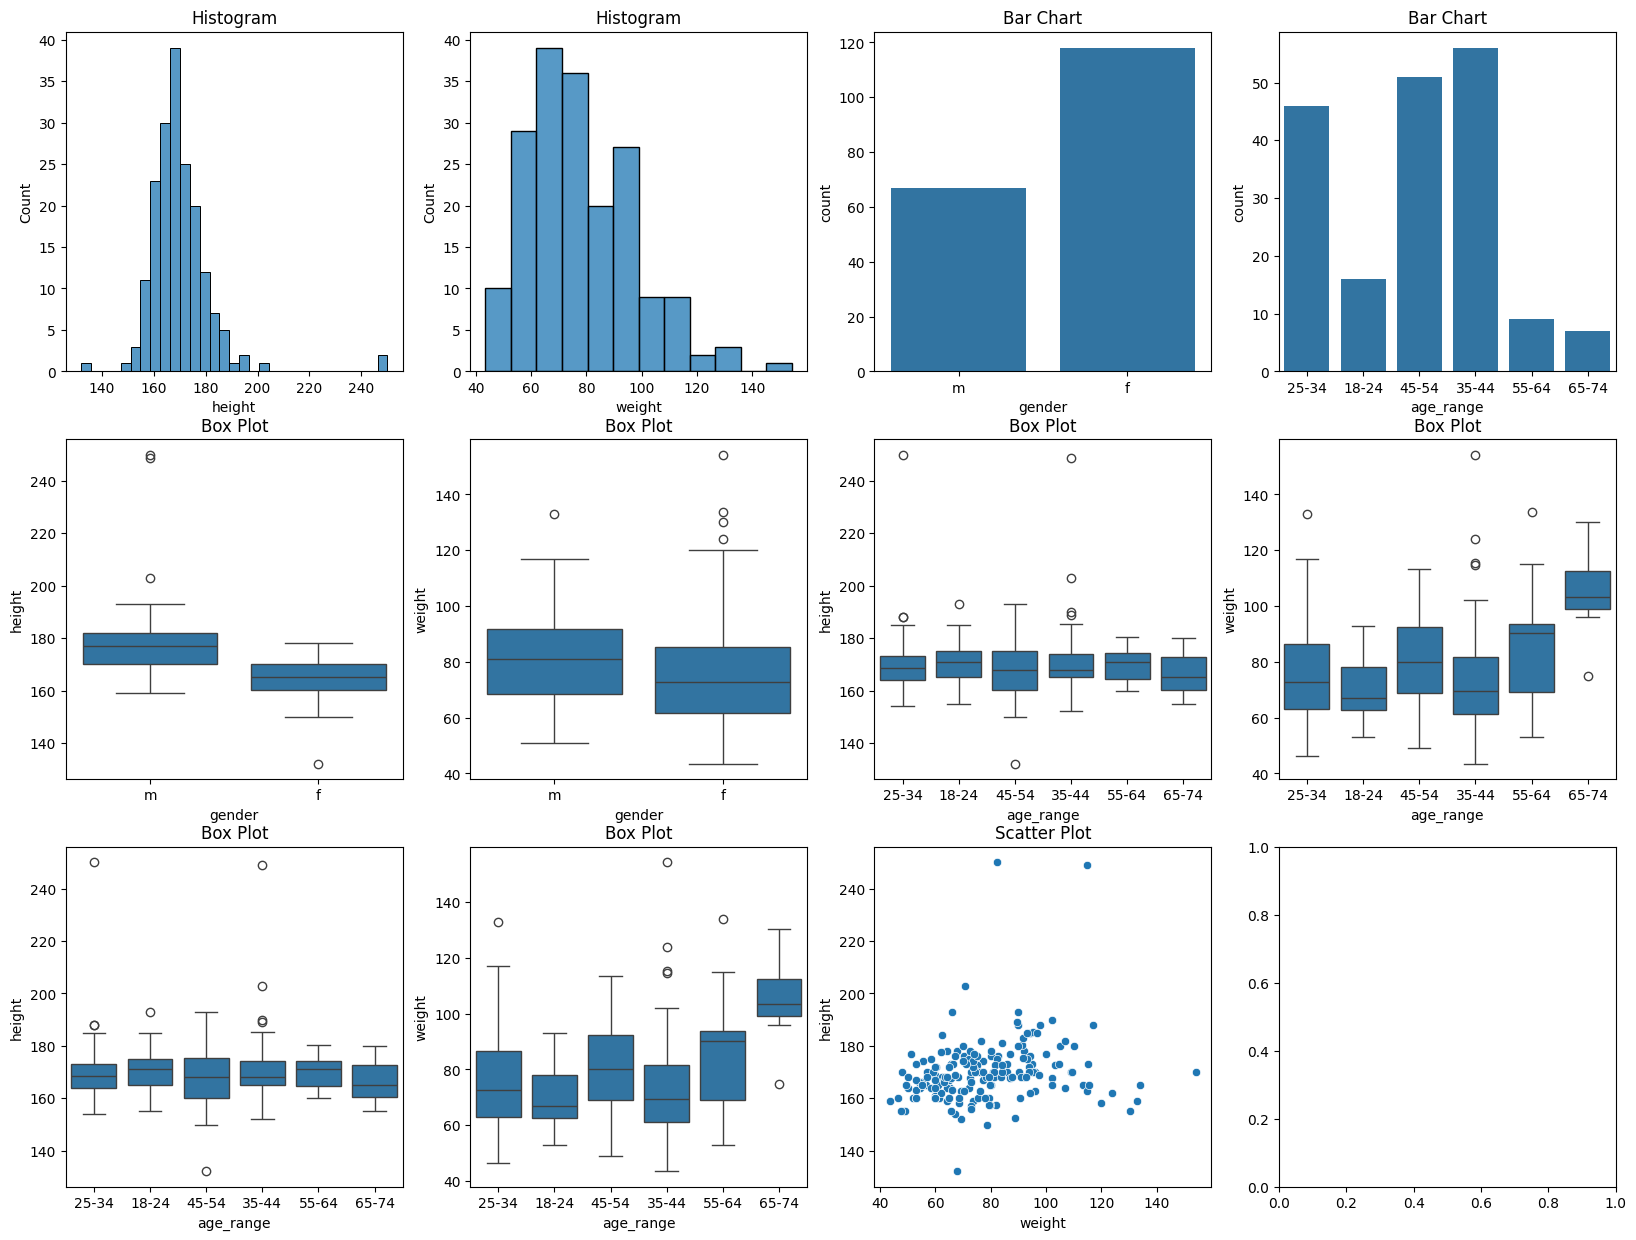

In [187]:
# Data Visualization - Participants' Generic Personal Data

print("\nData Visualization")
print("----------------------")

print("\nParticipants' Generic Personal Data")
# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Histogram
sns.histplot(data=df_participants, x="height", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

sns.histplot(data=df_participants, x="weight", ax=axes[0, 1])
axes[0, 1].set_title('Histogram')

# Bar chart
sns.countplot(data=df_participants, x="gender", ax=axes[0, 2])
axes[0, 2].set_title('Bar Chart')

sns.countplot(data=df_participants, x="age_range", ax=axes[0, 3])
axes[0, 3].set_title('Bar Chart')

# Box plot
sns.boxplot(data=df_participants, x="gender", y="height", ax=axes[1, 0])
axes[1, 0].set_title('Box Plot')

sns.boxplot(data=df_participants, x="gender", y="weight", ax=axes[1, 1])
axes[1, 1].set_title('Box Plot')

sns.boxplot(data=df_participants, x="age_range", y="height", ax=axes[1, 2])
axes[1, 2].set_title('Box Plot')

sns.boxplot(data=df_participants, x="age_range", y="weight", ax=axes[1, 3])
axes[1, 3].set_title('Box Plot')

sns.boxplot(data=df_participants, x="age_range", y="height", ax=axes[2, 0])
axes[2, 0].set_title('Box Plot')

sns.boxplot(data=df_participants, x="age_range", y="weight", ax=axes[2, 1])
axes[2, 1].set_title('Box Plot')

# Scatter plot
sns.scatterplot(data=df_participants, x="weight", y="height", ax=axes[2, 2])
axes[2, 2].set_title('Scatter Plot')

plt.show


Participants' Biometrics Data: Blood Pressure


<function matplotlib.pyplot.show(close=None, block=None)>

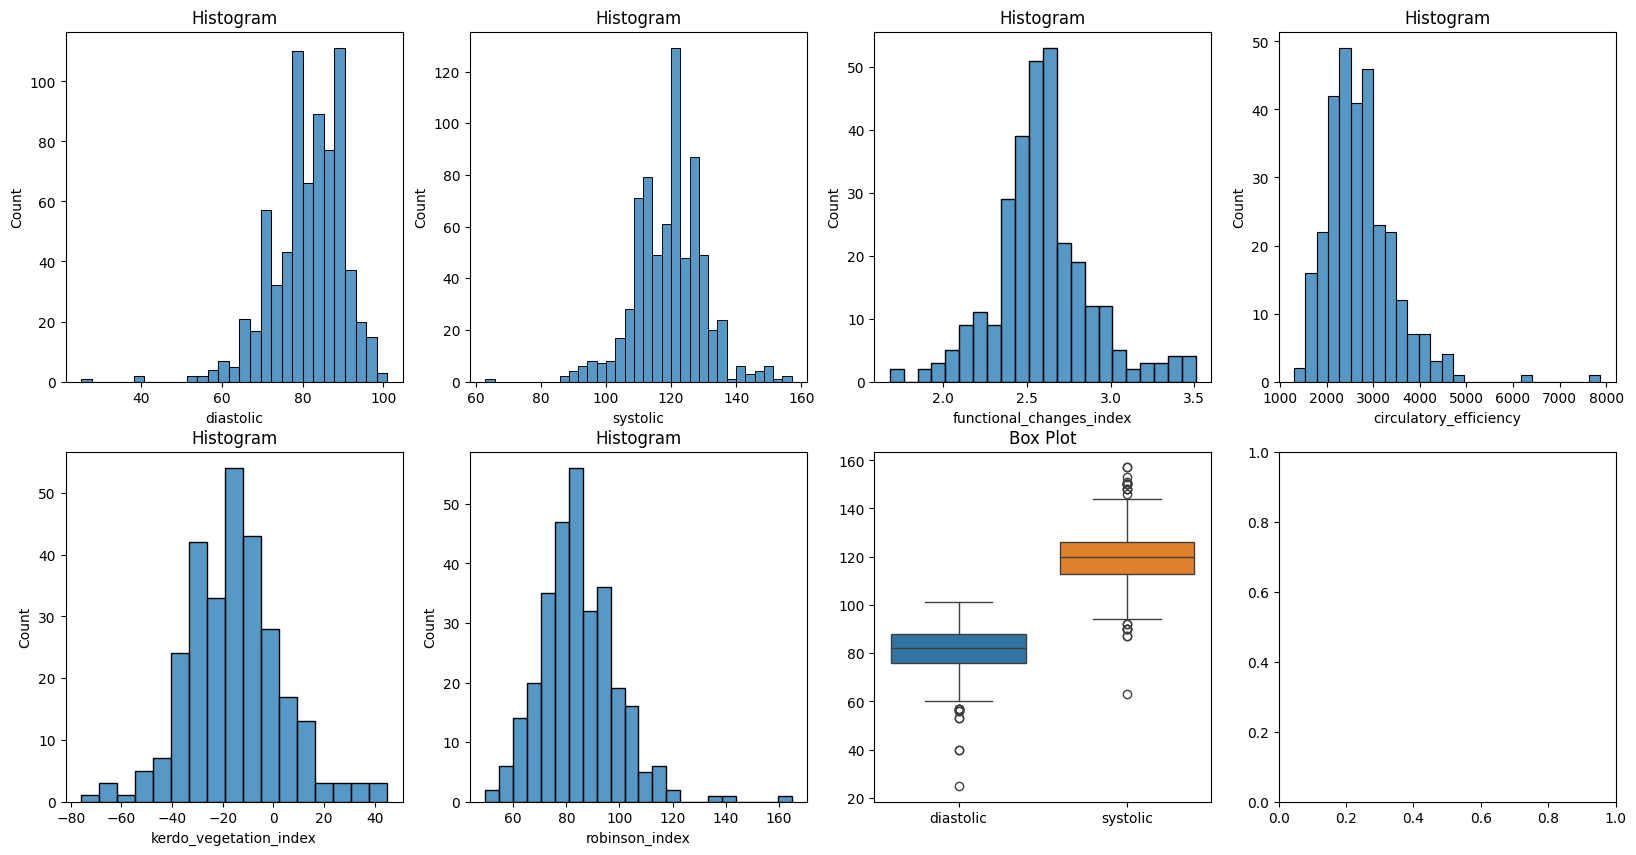

In [188]:
# Data Visualization - Participants' Biometrics Data: Blood Pressure

print("\nParticipants' Biometrics Data: Blood Pressure")
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Histogram
sns.histplot(data=df_blood_pressure, x="diastolic", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

sns.histplot(data=df_blood_pressure, x="systolic", ax=axes[0, 1])
axes[0, 1].set_title('Histogram')

sns.histplot(data=df_blood_pressure, x="functional_changes_index", ax=axes[0, 2])
axes[0, 2].set_title('Histogram')

sns.histplot(data=df_blood_pressure, x="circulatory_efficiency", ax=axes[0, 3])
axes[0, 3].set_title('Histogram')

sns.histplot(data=df_blood_pressure, x="kerdo_vegetation_index", ax=axes[1, 0])
axes[1, 0].set_title('Histogram')

sns.histplot(data=df_blood_pressure, x="robinson_index", ax=axes[1, 1])
axes[1, 1].set_title('Histogram')

# Box plot
sns.boxplot(data=df_blood_pressure[["diastolic", "systolic"]], ax=axes[1, 2])
axes[1, 2].set_title('Box Plot')

plt.show


Participants' Biometrics Data: Heart Rate


<function matplotlib.pyplot.show(close=None, block=None)>

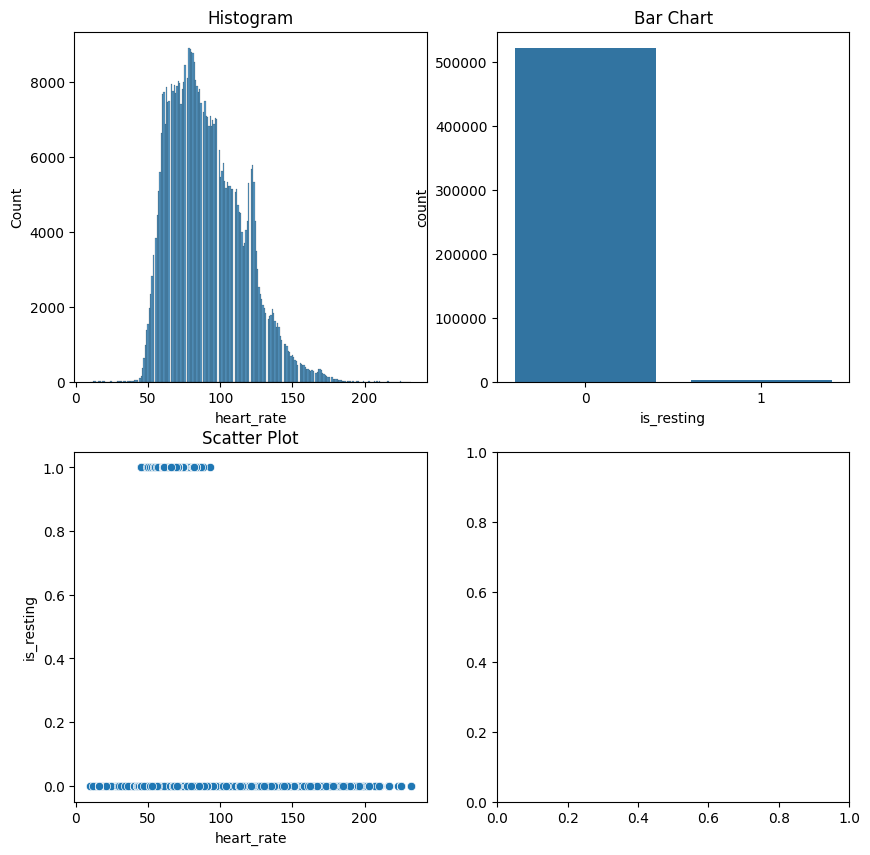

In [189]:
# Data Visualization - Participants' Biometrics Data: Heart Rate

print("\nParticipants' Biometrics Data: Heart Rate")
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Histogram
sns.histplot(data=df_heart_rate, x="heart_rate", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

# Bar chart
sns.countplot(data=df_heart_rate, x="is_resting", ax=axes[0, 1])
axes[0, 1].set_title('Bar Chart')

# Scatter plot
sns.scatterplot(data=df_heart_rate, x="heart_rate", y="is_resting", ax=axes[1, 0])
axes[1, 0].set_title('Scatter Plot')

plt.show


Participants' Biometrics Data: Heart Rate Variability (HRV) Measurements


<function matplotlib.pyplot.show(close=None, block=None)>

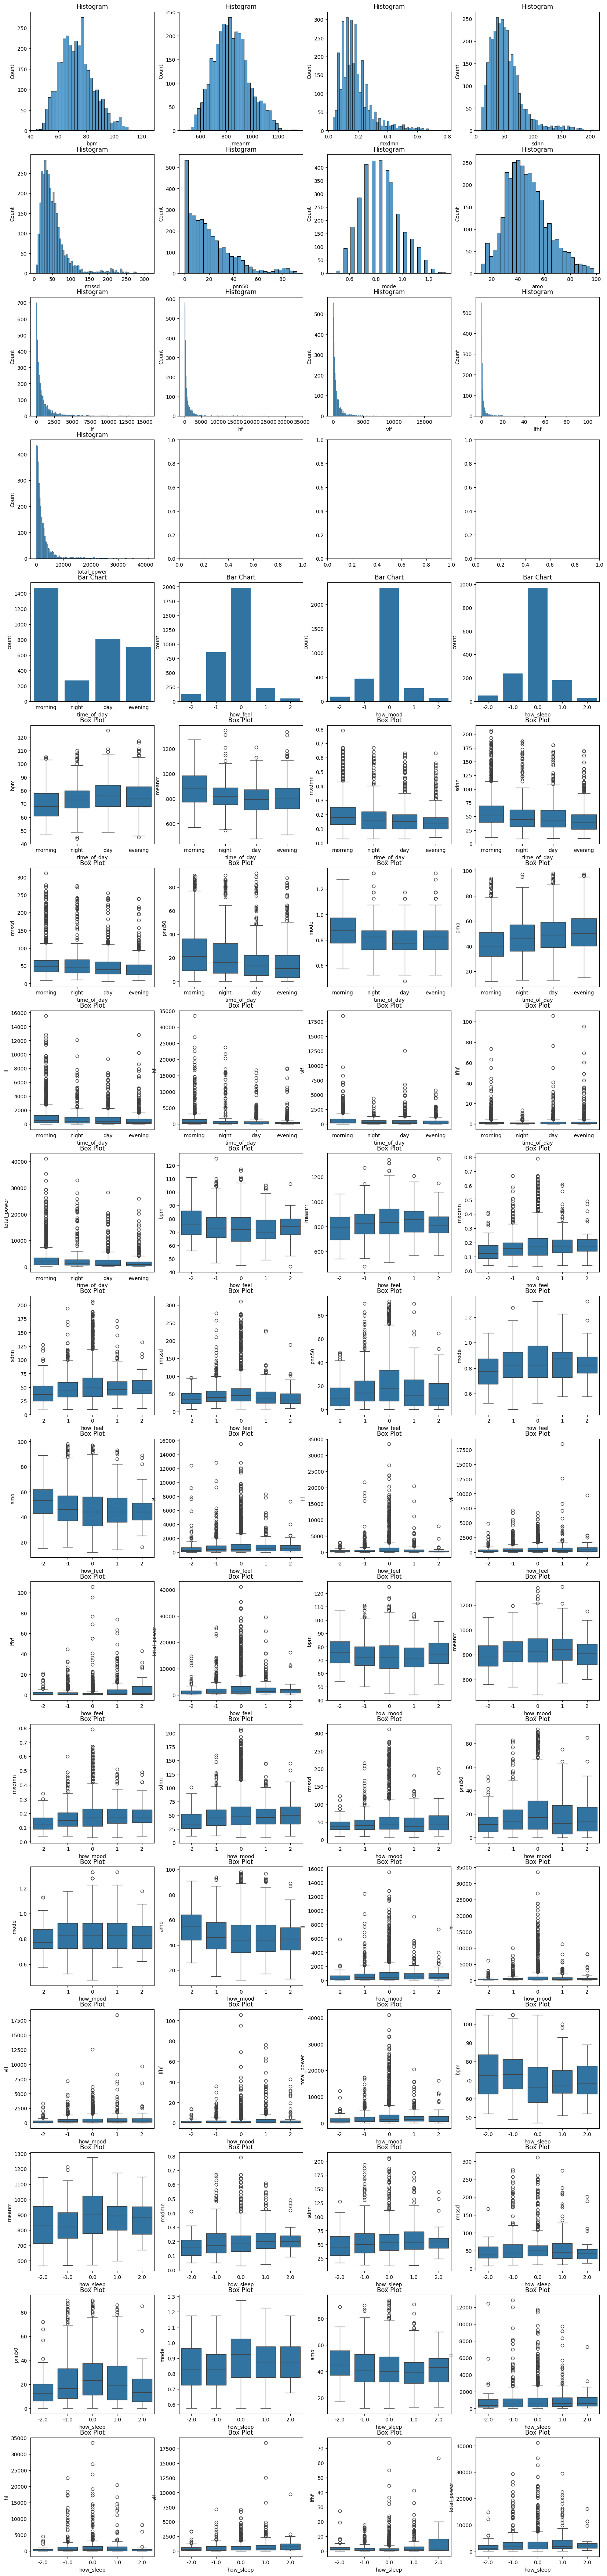

In [190]:
# Data Visualization - Participants' Biometrics Data: Heart Rate Variability (HRV) Measurements

print("\nParticipants' Biometrics Data: Heart Rate Variability (HRV) Measurements")
# Create a figure with subplots
fig, axes = plt.subplots(18, 4, figsize=(20, 90))

# Histogram
sns.histplot(data=df_hrv_measurements, x="bpm", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="meanrr", ax=axes[0, 1])
axes[0, 1].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="mxdmn", ax=axes[0, 2])
axes[0, 2].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="sdnn", ax=axes[0, 3])
axes[0, 3].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="rmssd", ax=axes[1, 0])
axes[1, 0].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="pnn50", ax=axes[1, 1])
axes[1, 1].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="mode", ax=axes[1, 2])
axes[1, 2].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="amo", ax=axes[1, 3])
axes[1, 3].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="lf", ax=axes[2, 0])
axes[2, 0].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="hf", ax=axes[2, 1])
axes[2, 1].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="vlf", ax=axes[2, 2])
axes[2, 2].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="lfhf", ax=axes[2, 3])
axes[2, 3].set_title('Histogram')

sns.histplot(data=df_hrv_measurements, x="total_power", ax=axes[3, 0])
axes[3, 0].set_title('Histogram')

# Bar chart
sns.countplot(data=df_hrv_measurements, x="time_of_day", ax=axes[4, 0])
axes[4, 0].set_title('Bar Chart')

sns.countplot(data=df_hrv_measurements, x="how_feel", ax=axes[4, 1])
axes[4, 1].set_title('Bar Chart')

sns.countplot(data=df_hrv_measurements, x="how_mood", ax=axes[4, 2])
axes[4, 2].set_title('Bar Chart')

sns.countplot(data=df_hrv_measurements, x="how_sleep", ax=axes[4, 3])
axes[4, 3].set_title('Bar Chart')

# Box plot
sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="bpm", ax=axes[5, 0])
axes[5, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="meanrr", ax=axes[5, 1])
axes[5, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="mxdmn", ax=axes[5, 2])
axes[5, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="sdnn", ax=axes[5, 3])
axes[5, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="rmssd", ax=axes[6, 0])
axes[6, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="pnn50", ax=axes[6, 1])
axes[6, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="mode", ax=axes[6, 2])
axes[6, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="amo", ax=axes[6, 3])
axes[6, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="lf", ax=axes[7, 0])
axes[7, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="hf", ax=axes[7, 1])
axes[7, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="vlf", ax=axes[7, 2])
axes[7, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="lfhf", ax=axes[7, 3])
axes[7, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="time_of_day", y="total_power", ax=axes[8, 0])
axes[8, 0].set_title('Box Plot')


sns.boxplot(data=df_hrv_measurements, x="how_feel", y="bpm", ax=axes[8, 1])
axes[8, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="meanrr", ax=axes[8, 2])
axes[8, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="mxdmn", ax=axes[8, 3])
axes[8, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="sdnn", ax=axes[9, 0])
axes[9, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="rmssd", ax=axes[9, 1])
axes[9, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="pnn50", ax=axes[9, 2])
axes[9, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="mode", ax=axes[9, 3])
axes[9, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="amo", ax=axes[10, 0])
axes[10, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="lf", ax=axes[10, 1])
axes[10, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="hf", ax=axes[10, 2])
axes[10, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="vlf", ax=axes[10, 3])
axes[10, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="lfhf", ax=axes[11, 0])
axes[11, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_feel", y="total_power", ax=axes[11, 1])
axes[11, 1].set_title('Box Plot')


sns.boxplot(data=df_hrv_measurements, x="how_mood", y="bpm", ax=axes[11, 2])
axes[11, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="meanrr", ax=axes[11, 3])
axes[11, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="mxdmn", ax=axes[12, 0])
axes[12, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="sdnn", ax=axes[12, 1])
axes[12, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="rmssd", ax=axes[12, 2])
axes[12, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="pnn50", ax=axes[12, 3])
axes[12, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="mode", ax=axes[13, 0])
axes[13, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="amo", ax=axes[13, 1])
axes[13, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="lf", ax=axes[13, 2])
axes[13, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="hf", ax=axes[13, 3])
axes[13, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="vlf", ax=axes[14, 0])
axes[14, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="lfhf", ax=axes[14, 1])
axes[14, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_mood", y="total_power", ax=axes[14, 2])
axes[14, 2].set_title('Box Plot')


sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="bpm", ax=axes[14, 3])
axes[14, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="meanrr", ax=axes[15, 0])
axes[15, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="mxdmn", ax=axes[15, 1])
axes[15, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="sdnn", ax=axes[15, 2])
axes[15, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="rmssd", ax=axes[15, 3])
axes[15, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="pnn50", ax=axes[16, 0])
axes[16, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="mode", ax=axes[16, 1])
axes[16, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="amo", ax=axes[16, 2])
axes[16, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="lf", ax=axes[16, 3])
axes[16, 3].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="hf", ax=axes[17, 0])
axes[17, 0].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="vlf", ax=axes[17, 1])
axes[17, 1].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="lfhf", ax=axes[17, 2])
axes[17, 2].set_title('Box Plot')

sns.boxplot(data=df_hrv_measurements, x="how_sleep", y="total_power", ax=axes[17, 3])
axes[17, 3].set_title('Box Plot')

plt.show


Participants' Biometrics Data: Sleep Data


<function matplotlib.pyplot.show(close=None, block=None)>

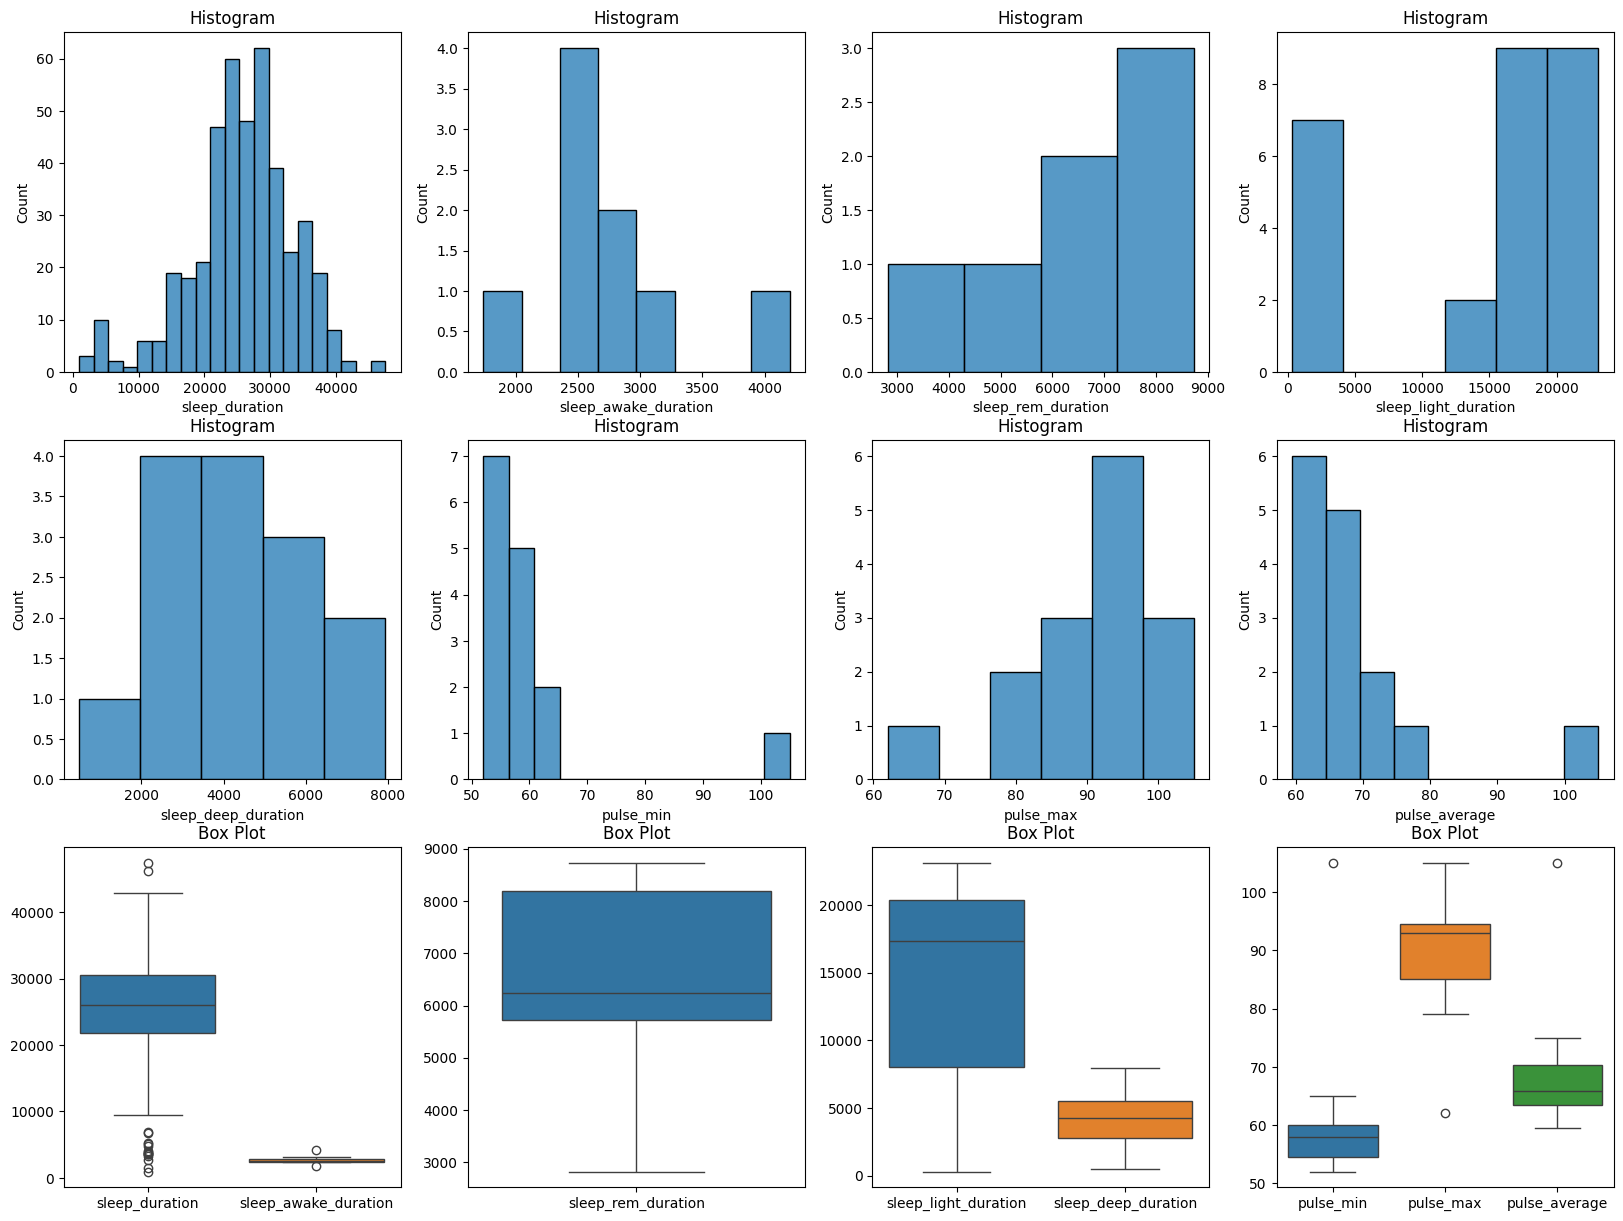

In [191]:
# Data Visualization - Participants' Biometrics Data: Sleep Data

print("\nParticipants' Biometrics Data: Sleep Data")
# Create a figure with subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Histogram
sns.histplot(data=df_sleep, x="sleep_duration", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

sns.histplot(data=df_sleep, x="sleep_awake_duration", ax=axes[0, 1])
axes[0, 1].set_title('Histogram')

sns.histplot(data=df_sleep, x="sleep_rem_duration", ax=axes[0, 2])
axes[0, 2].set_title('Histogram')

sns.histplot(data=df_sleep, x="sleep_light_duration", ax=axes[0, 3])
axes[0, 3].set_title('Histogram')

sns.histplot(data=df_sleep, x="sleep_deep_duration", ax=axes[1, 0])
axes[1, 0].set_title('Histogram')

sns.histplot(data=df_sleep, x="pulse_min", ax=axes[1, 1])
axes[1, 1].set_title('Histogram')

sns.histplot(data=df_sleep, x="pulse_max", ax=axes[1, 2])
axes[1, 2].set_title('Histogram')

sns.histplot(data=df_sleep, x="pulse_average", ax=axes[1, 3])
axes[1, 3].set_title('Histogram')

# Box plot
sns.boxplot(data=df_sleep[["sleep_duration", "sleep_awake_duration"]], ax=axes[2, 0])
axes[2, 0].set_title('Box Plot')

sns.boxplot(data=df_sleep[["sleep_rem_duration"]], ax=axes[2, 1])
axes[2, 1].set_title('Box Plot')

sns.boxplot(data=df_sleep[["sleep_light_duration", "sleep_deep_duration"]], ax=axes[2, 2])
axes[2, 2].set_title('Box Plot')

sns.boxplot(data=df_sleep[["pulse_min", "pulse_max", "pulse_average"]], ax=axes[2, 3])
axes[2, 3].set_title('Box Plot')

plt.show


Participants' Biometrics Data: Wearables Data


<function matplotlib.pyplot.show(close=None, block=None)>

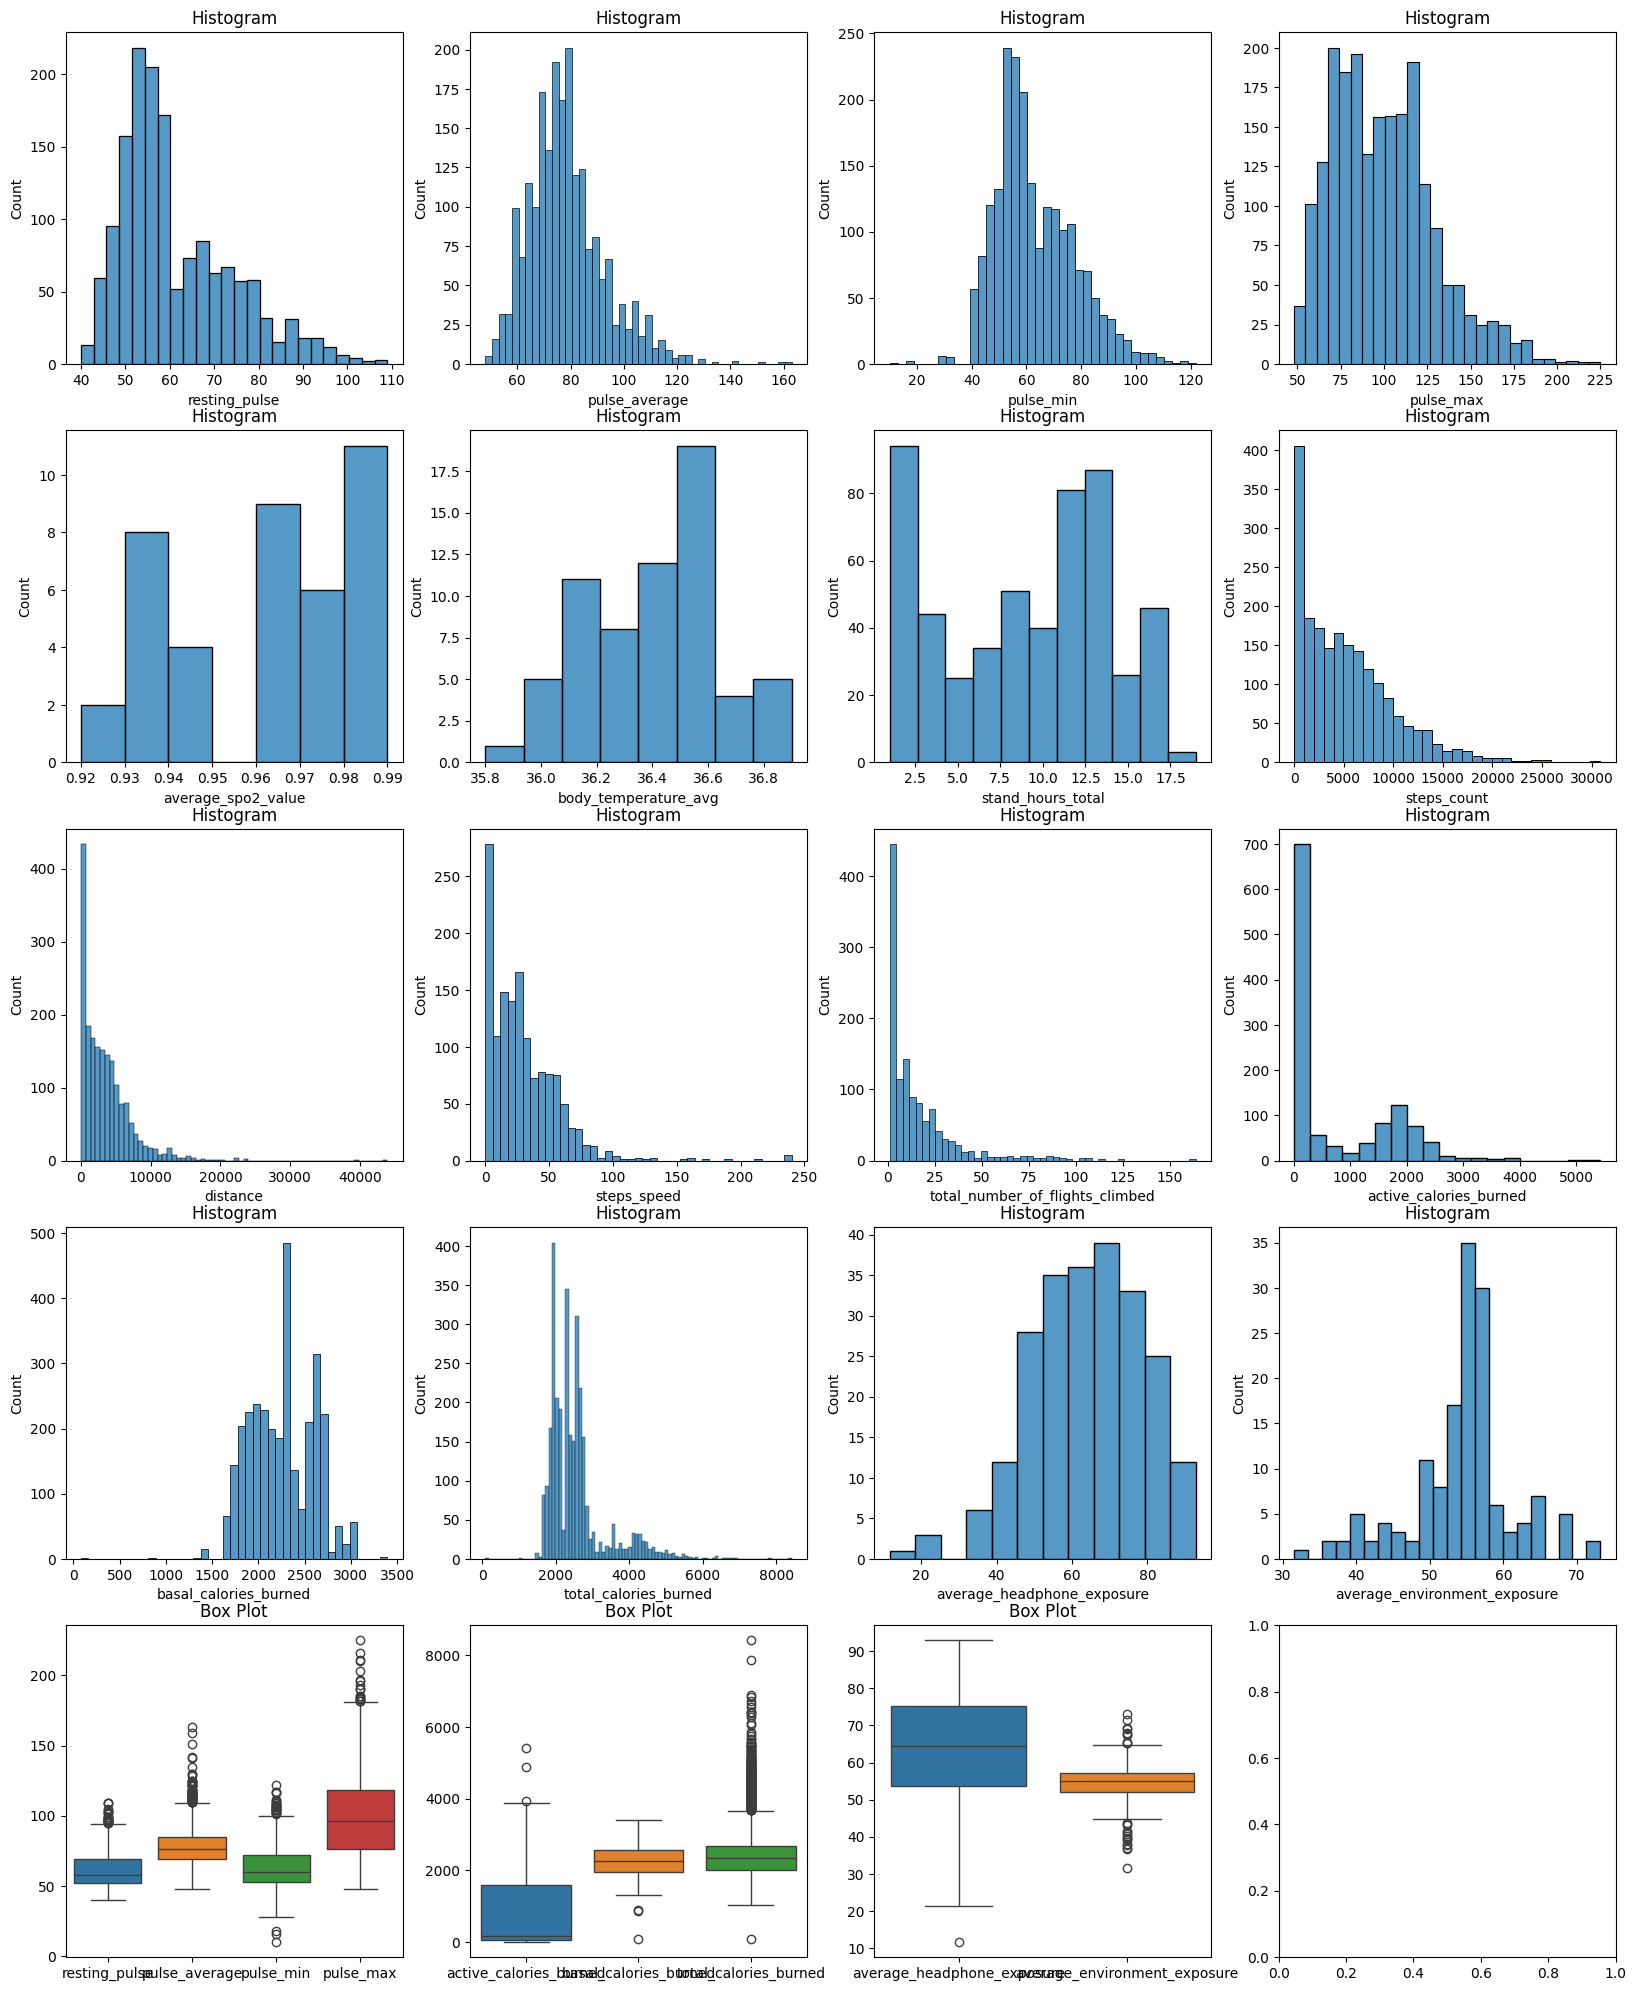

In [192]:
# Data Visualization - Participants' Biometrics Data: Wearables Data

print("\nParticipants' Biometrics Data: Wearables Data")
# Create a figure with subplots
fig, axes = plt.subplots(5, 4, figsize=(20, 25))

# Histogram
sns.histplot(data=df_wearables, x="resting_pulse", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

sns.histplot(data=df_wearables, x="pulse_average", ax=axes[0, 1])
axes[0, 1].set_title('Histogram')

sns.histplot(data=df_wearables, x="pulse_min", ax=axes[0, 2])
axes[0, 2].set_title('Histogram')

sns.histplot(data=df_wearables, x="pulse_max", ax=axes[0, 3])
axes[0, 3].set_title('Histogram')

sns.histplot(data=df_wearables, x="average_spo2_value", ax=axes[1, 0])
axes[1, 0].set_title('Histogram')

sns.histplot(data=df_wearables, x="body_temperature_avg", ax=axes[1, 1])
axes[1, 1].set_title('Histogram')

sns.histplot(data=df_wearables, x="stand_hours_total", ax=axes[1, 2])
axes[1, 2].set_title('Histogram')

sns.histplot(data=df_wearables, x="steps_count", ax=axes[1, 3])
axes[1, 3].set_title('Histogram')

sns.histplot(data=df_wearables, x="distance", ax=axes[2, 0])
axes[2, 0].set_title('Histogram')

sns.histplot(data=df_wearables, x="steps_speed", ax=axes[2, 1])
axes[2, 1].set_title('Histogram')

sns.histplot(data=df_wearables, x="total_number_of_flights_climbed", ax=axes[2, 2])
axes[2, 2].set_title('Histogram')

sns.histplot(data=df_wearables, x="active_calories_burned", ax=axes[2, 3])
axes[2, 3].set_title('Histogram')

sns.histplot(data=df_wearables, x="basal_calories_burned", ax=axes[3, 0])
axes[3, 0].set_title('Histogram')

sns.histplot(data=df_wearables, x="total_calories_burned", ax=axes[3, 1])
axes[3, 1].set_title('Histogram')

sns.histplot(data=df_wearables, x="average_headphone_exposure", ax=axes[3, 2])
axes[3, 2].set_title('Histogram')

sns.histplot(data=df_wearables, x="average_environment_exposure", ax=axes[3, 3])
axes[3, 3].set_title('Histogram')

# Box plot
sns.boxplot(data=df_wearables[["resting_pulse", "pulse_average", "pulse_min", "pulse_max"]], ax=axes[4, 0])
axes[4, 0].set_title('Box Plot')

sns.boxplot(data=df_wearables[["active_calories_burned", "basal_calories_burned", "total_calories_burned"]], ax=axes[4, 1])
axes[4, 1].set_title('Box Plot')

sns.boxplot(data=df_wearables[["average_headphone_exposure", "average_environment_exposure"]], ax=axes[4, 2])
axes[4, 2].set_title('Box Plot')

plt.show


Weather Condition Data for Participants' Locations


<function matplotlib.pyplot.show(close=None, block=None)>

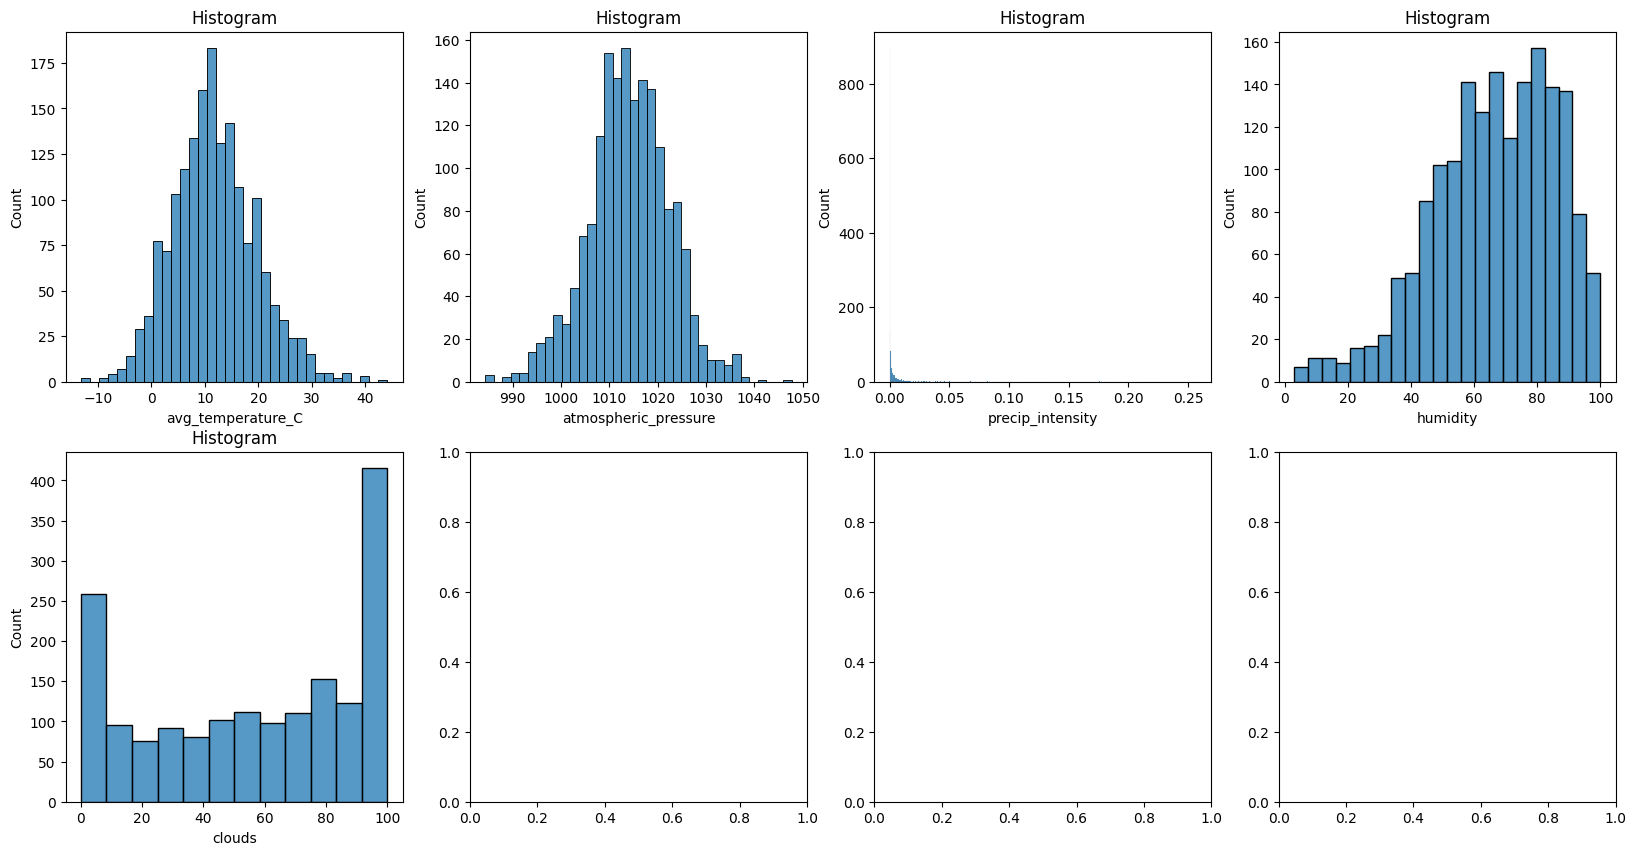

In [193]:
# Data Visualization - Weather Condition Data for Participants' Locations

print("\nWeather Condition Data for Participants' Locations")
# Create a figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Histogram
sns.histplot(data=df_weather, x="avg_temperature_C", ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

sns.histplot(data=df_weather, x="atmospheric_pressure", ax=axes[0, 1])
axes[0, 1].set_title('Histogram')

sns.histplot(data=df_weather, x="precip_intensity", ax=axes[0, 2])
axes[0, 2].set_title('Histogram')

sns.histplot(data=df_weather, x="humidity", ax=axes[0, 3])
axes[0, 3].set_title('Histogram')

sns.histplot(data=df_weather, x="clouds", ax=axes[1, 0])
axes[1, 0].set_title('Histogram')

plt.show


Participants' Survey Data


<function matplotlib.pyplot.show(close=None, block=None)>

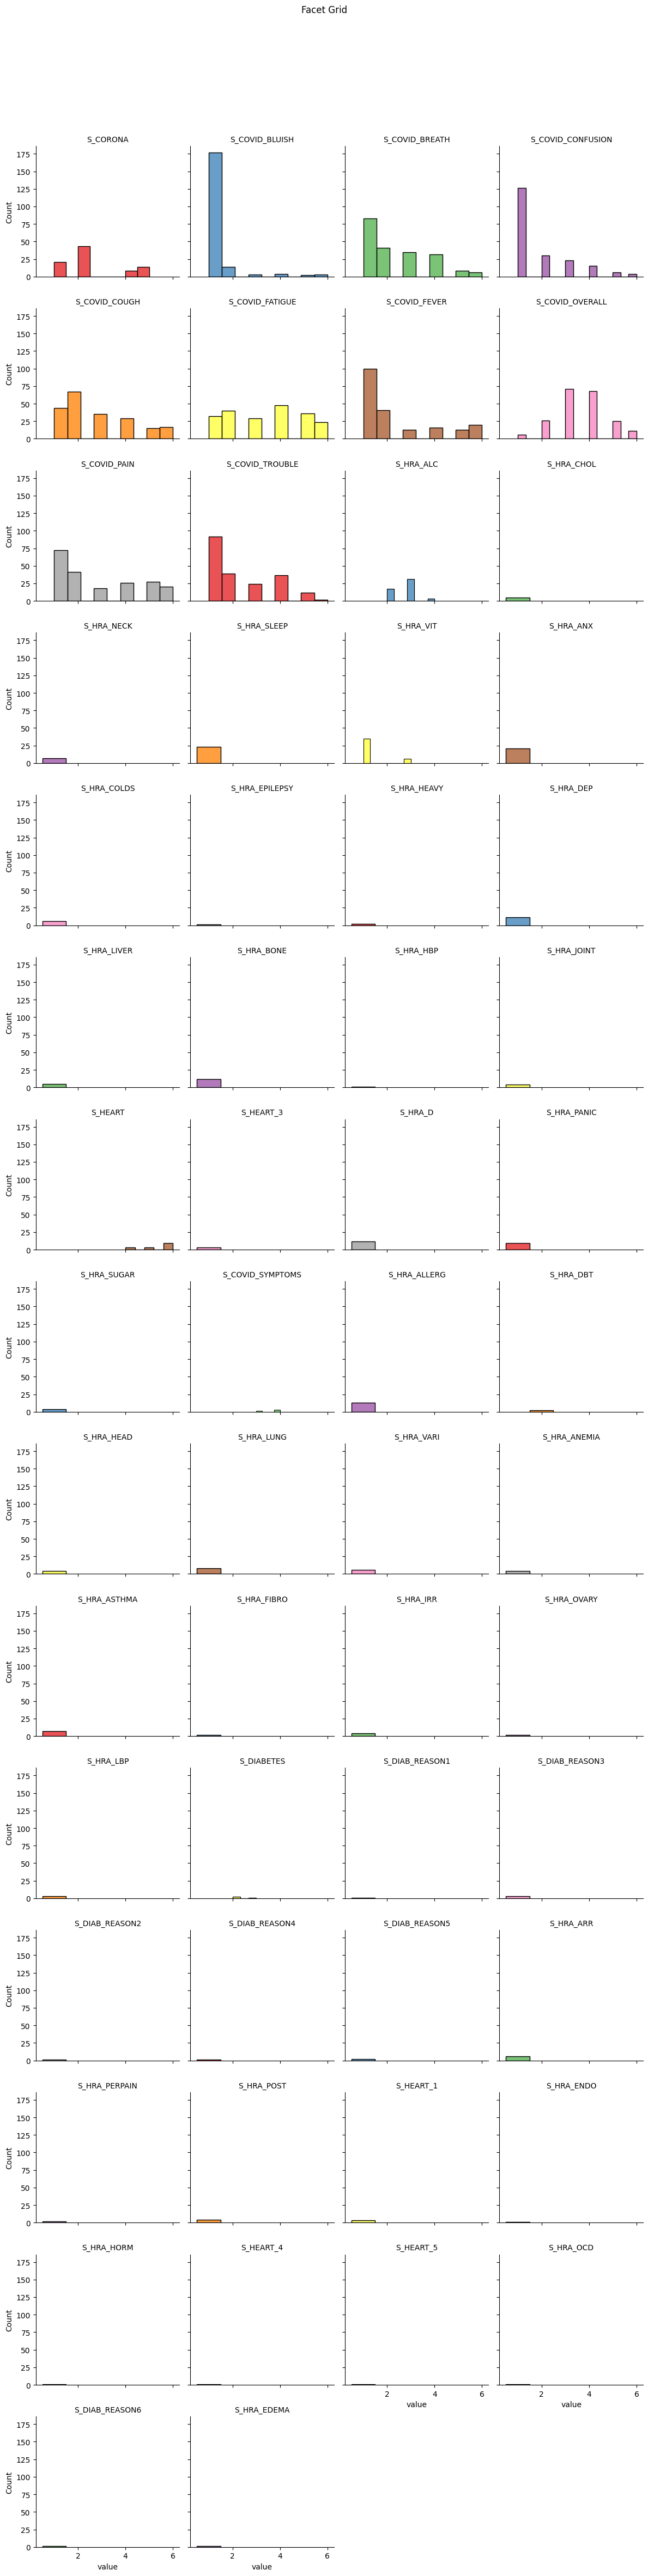

In [194]:
# Data Visualization - Participants' Survey Data

print("\nParticipants' Survey Data")
# Facet grid
g = sns.FacetGrid(df_surveys, col="scale", hue="scale", palette="Set1", col_wrap=4)
g.map(sns.histplot, "value")
g.set_titles("{col_name}")
g.fig.suptitle("Facet Grid", y=1.05)

plt.show

#### **Interpretation of Data Visualizations**

Some histogram visualizations shows that the features may be Gaussian-like, however, many are not.<br>

Based on box plots, several features obviously have outliers, and we have to handle them properly later. For several features that are not Gaussian-like, we may use IQR Method to remove outliers from these features instead of Standard Deviation Method.<br>

We have to be careful for any analysis that assume normal distribution, as many features are not Gaussian-like.<br>
***

#### **4. Discuss and implement strategies for Handling Missing Values, Removing Duplicates, and Handling Outliers**

**Duplicated Rows:**<br>
There is no duplicated rows in the dataset.<br>

**Missing Values:**<br>

**Participants' Generic Personal Data:**<br>
"city", "country", and "height" seem to be missing completely at random (MCAR), as there is no observable pattern in the missing data. Another possibility is that some participants with no "city"/"country" may travel from one city/one country to another, but given that during Covid-19 pandemic, most countries closed their borders, this is unlikely.<br>

As missing data for "country" and "height" are less than 5% of total observations, we may consider removing these observations. Nevertheless, if in our certain studies, we will not utilize these features, then we may retain these observations (with no "country" or no "height")<br>

However, this is not the case for "city" and "symptoms_onset", where missing data are more than 5% of total observations.<br>

For city, we already have country to represent location of participants, so we may consider dropping city.<br>

For "symptoms_onset", missing data may indicate that the participants did not know when they actually started to have symptoms due to mild symptoms at the onset (which may be unobserved), implying that it may be missing not at random (MNAR). The fact that some "symptoms_onset" are missing may be valuable so we may consider fill in with the date 1/1/1500 (which is very far from dates in observed data), and also add a new feature "missing_symptoms_onset" that acts as a missing flag (0 or 1)<br>

**Participants' Biometrics Data: Blood Pressure**<br>
Approximately 60% of "functional_changes_index", "circulatory_efficiency", "kerdo_vegetation_index", "robinson_index" are missing completely at random (MCAR). Based on the inspection of data, we found that for each specific participant, these four indices are missing in some measurement date/time. This may be due to the different frequency of measurement, where these four indices are measured less frequent than "diastolic" and "systolic" pressure.<br>

The correlation between diastolic/systolic and these four indices are not high, so we will not drop these four indices. In regular study, we may revisit the data measurement frequency, by measuring these four indices in every measurement of diastolic/systolic to correct the problem at the source, however, this is impossible after the Covid-19 pandemic ended.<br>

In this case, the missing data reduce analyzable population of the study but should not introduce bias, so the remaining data (with these four indices available) can be utilized in our analysis and considered a simple random sample of the full dataset.<br>

**Participants' Biometrics Data: Heart Rate Variability (HRV) Measurements**<br>
"how_feel", "how_mood", and "how_sleep" are all responses from post-measurement survey. While there is no missing value for "how_feel" and "how_mood", approx 55% of "how_sleep" are missing. One possible explanation is that, each participant may sleep in certain time of the day, and outside of the normal sleep time, sleep score is not applicable, so the participant does not give a sleep score. This implies that how_sleep may be considered to be missing at random (MAR). In order to test if it is actually MAR, we can divide observations into normal sleep time / outside of normal sleep time and test if the rate that how_sleep is missing obviously different in the two groups and calculate the conditional probability.<br>

"tags" are assigned by user in text format, and are qualitative description. While 32% of tags are missing, we should retain it for further qualitative analysis (to complement our quantitative analysis), if needed.<br>

**Participants' Biometrics Data: Sleep Data**<br>
More than 90% of "sleep_awake_duration", "sleep_rem_duration", "sleep_light_duration", "sleep_deep_duration", "pulse_min", "pulse_max", "pulse_average" are missing. This may result from the lack of sleep monitoring devices for many participants. In fact, there are only 10 users who have sleep records, and only 3 users have these 7 specific sleep measurements. This may be considered to be missing completely at random (MCAR). As the sample size (with these 7 specific sleep measurements) is very small, we can drop the these features. We can use "how_sleep" (in HRV Measurement) together with the rest of sleep data for our analysis of sleep.<br>

However, if these 7 specific sleep measurements are intentionally performed on only for specific groups of patients (such as those are critically ill or have rare symptoms) and may be useful in a very specific deep study, then we may retain these features, but we have to be careful as there are only 3 users with these 7 sleep measurements.<br>

**Participants' Biometrics Data: Wearables Data**<br>
For "basal_calories_burned" and "total_calories_burned", there is only one observation missing the two. This is missing completely at random (MCAR) so we should remove the observation without "basal_calories_burned"/"total_calories_burned"<br>

30-90% of the rest of numeric measurements are missing. As many of these measurements must be done on different types of devices, with different measurement frequency, or the availability of devices in certain areas during Covid-19 pandemic, this suggests the possibilities that these numeric measurements are missing completely at random (MCAR).<br>

Another possibility is that, due to cost constrains or limited number of measurement devices, some measurements were performed on participants who have specific symptoms only, and that participants without these measurements are those who have observed symptoms/other observed measurements that do not meet some thresholds (so they were not qualified to participate in these measurements), implying that missing data may be considered to be missing at random (MAR).<br>

While we may consider these missing values as MCAR, we cannot remove the associated observations due to large number of missing data.<br>
In this case, the missing data reduce analyzable population of the study but should not introduce bias, so the remaining data can be utilized in our analysis and considered a simple random sample of the full dataset.<br>


**Outliers:**<br>

For Gaussian-like features, such as , we should detect outliers via Standard Deviation Method.<br>
For non-Gaussian features, such as , we should use IQR Method instead.<br>

Although based on kurtosis and skewness, there are several features that may possibly be Gaussian-like, normality test should be performed first before concluding that they are Gaussian-like.<br>

In this case, we will then use IQR Method to detect outliers. We will not remove them as we cannot find out where the outliers come from, and we have no expertise in healthcare.<br>

For survey data, they are based on assigned discreet value with specific ranges, so survey data has no outliers.<br>

In [195]:
# Handling Missing Values
print("\nHandling Missing Values")
print("----------------------")

print("\nParticipants' Generic Personal Data")
print(f"Dimensions before data dropped: {df_participants.shape}")
# Remove observations that have no "country" or no "height"
df_participants.dropna(subset=["country", "height"], inplace=True)

# Drop "city"
df_participants.drop(["city"], axis=1, inplace=True)

# For "symptoms_onset", fill in with the date 1/1/1500, and add a new feature "missing_symptoms_onset" (flag = 1 if symptoms_onset missing, otherwise 0)
values = {"symptoms_onset": "1/1/1500"}
df_participants.fillna(value=values, inplace=True)
print(f"Dimensions after data dropped: {df_participants.shape}")

print("\nParticipants' Biometrics Data: Sleep Data")
print(f"Dimensions before data dropped: {df_sleep.shape}")
# Drop "sleep_awake_duration", "sleep_rem_duration", "sleep_light_duration", "sleep_deep_duration", "pulse_min", "pulse_max", "pulse_average"
df_sleep.drop(["sleep_awake_duration", "sleep_rem_duration", "sleep_light_duration", "sleep_deep_duration", "pulse_min", "pulse_max", "pulse_average"], axis=1, inplace=True)
print(f"Dimensions after data dropped: {df_sleep.shape}")

print("\nParticipants' Biometrics Data: Wearables Data")
print(f"Dimensions before data dropped: {df_wearables.shape}")
# Remove the observation without "basal_calories_burned"/"total_calories_burned"
df_wearables.dropna(subset=["basal_calories_burned", "total_calories_burned"], inplace=True)
print(f"Dimensions after data dropped: {df_wearables.shape}")


Handling Missing Values
----------------------

Participants' Generic Personal Data
Dimensions before data dropped: (185, 8)
Dimensions after data dropped: (177, 7)

Participants' Biometrics Data: Sleep Data
Dimensions before data dropped: (425, 12)
Dimensions after data dropped: (425, 5)

Participants' Biometrics Data: Wearables Data
Dimensions before data dropped: (3098, 18)
Dimensions after data dropped: (3097, 18)


In [196]:
# Handling Outliers
print("\nHandling Outliers")
print("----------------------")

numeric_columns6 = df_wearables.select_dtypes(include=[np.number]).columns

def find_outliers(df, print_on_screen=True, elim_outliers=False):
    """Find outliers from dataframe df and print them on terminal"""
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for current_column in numeric_columns:
        # Calculate 75% percentile and 25% percentile
        Q3 = df[current_column].quantile(0.75)
        Q1 = df[current_column].quantile(0.25)

        # Calculate IQR thresholds
        IQR = Q3 - Q1
        k = 1.5
        upper_threshold = Q3 + k*IQR
        lower_threshold = Q1 - k*IQR

        # Identify Outliers and print them on screen
        outliers = df[(df[current_column] < lower_threshold) | (df[current_column] > upper_threshold)]
        if print_on_screen:
            print(f"\nOutliers detected from feature: {current_column}")
            print(outliers)
        if elim_outliers:
            df = df.drop(outliers.index)

df_list = [df_participants, df_blood_pressure, df_heart_rate, df_hrv_measurements, df_sleep, df_wearables, df_weather]
df_description = ["Participants' Generic Personal Data",
                    "Participants' Biometrics Data: Blood Pressure",
                    "Participants' Biometrics Data: Heart Rate",
                    "Participants' Biometrics Data: Heart Rate Variability (HRV) Measurements",
                    "Participants' Biometrics Data: Sleep Data",
                    "Participants' Biometrics Data: Wearables Data",
                    "Weather Condition Data for Participants' Locations"]

counter = 0
for df in df_list:
    print(f"\nOutliers detected from dataframe: {df_description[counter]}")
    find_outliers(df)
    counter += 1


Handling Outliers
----------------------

Outliers detected from dataframe: Participants' Generic Personal Data

Outliers detected from feature: height
      user_code gender age_range        country  height   weight  \
49   3fff7627ca      m     35-44  United States  248.92  114.713   
65   5214210ed1      f     45-54  United States  132.08   67.903   
83   6ce06ce747      m     35-44         Russia  203.00   70.534   
102  83161408c1      m     25-34           Iraq  250.00   82.146   
136  b3c7f65a4b      m     18-24  United States  193.00   65.998   
175  f8b552df37      m     45-54         Russia  193.00   90.000   

    symptoms_onset  
49        4/5/1984  
65       3/15/2020  
83        1/1/1500  
102       1/1/1993  
136       6/7/2000  
175      4/25/2020  

Outliers detected from feature: weight
      user_code gender age_range        country  height   weight  \
24   1f2eb6aded      m     25-34          Qatar  159.00  132.900   
109  960cd609d9      f     55-64  United States

#### **5. Perform data transformation as appropriate**

Based on kurtosis and skewness, there are several features that may possibly be Gaussian-like.<br>
If we assume that these features are normally distributed, then we may consider tranforming them via Z-Score standardization to rescale them to zero mean and unit variance.<br>

Here we are going to perform Z-Score standardization on the following features from HRV Measurement Data: bpm, meanrr, mode<br>

Prior to the Z-Score standardization, we will eliminate outliers first, by assuming that they came from measurement, data entry, experimental, or data processing error.<br>

In [197]:
# Data Transformation
print("\nData Transformation")
print("----------------------")

# Eliminate all outliers in df_hrv_measurements
find_outliers(df_hrv_measurements, print_on_screen=False, elim_outliers=True)

# Z-Score standardization
df_hrv_measurements_z = df_hrv_measurements[["bpm", "meanrr", "mode"]].copy()
print("\nHRV Measurements Data: Mean and Standard Deviation before the Z-Score standardization (only three features)")
print(df_hrv_measurements_z.describe().loc[['mean', 'std']])

column_for_z = df_hrv_measurements_z.columns
for current_column in column_for_z: 
    df_hrv_measurements_z[current_column] = (df_hrv_measurements_z[current_column] - df_hrv_measurements_z[current_column].mean()) / df_hrv_measurements_z[current_column].std()      

print("\nHRV Measurements Data: Mean and Standard Deviation after the Z-Score standardization (only three features)")
print(df_hrv_measurements_z.describe().loc[['mean', 'std']])

print("\nHRV Measurements Data: After the Z-Score standardization (only three features and first ten rows shown)")
print(df_hrv_measurements_z.head(10))


Data Transformation
----------------------

HRV Measurements Data: Mean and Standard Deviation before the Z-Score standardization (only three features)
            bpm      meanrr      mode
mean  73.257935  839.600366  0.837465
std   12.201088  137.420367  0.144769

HRV Measurements Data: Mean and Standard Deviation after the Z-Score standardization (only three features)
               bpm        meanrr          mode
mean -2.802757e-16  2.189654e-16  2.802757e-16
std   1.000000e+00  1.000000e+00  1.000000e+00

HRV Measurements Data: After the Z-Score standardization (only three features and first ten rows shown)
        bpm    meanrr      mode
0  0.142779 -0.318005 -0.431482
1 -0.267020  0.133893  0.259272
2  0.798459 -0.840489 -0.776859
3  0.142779 -0.268958 -0.086105
4  0.388659 -0.520522 -0.431482
5 -0.348980  0.147792  0.259272
6 -0.021140 -0.120509 -0.086105
7 -0.021140 -0.185128 -0.086105
8  0.880419 -0.912749 -0.776859
9 -0.430940  0.298061  0.259272


#### 6. **Create at least one new feature and document your approach**


Feature Engineering
-------------------
New Features from Participants' Generic Personal Data: Index(['user_code', 'gender', 'age_range', 'country', 'height', 'weight',
       'symptoms_onset', 'bmi'],
      dtype='object')


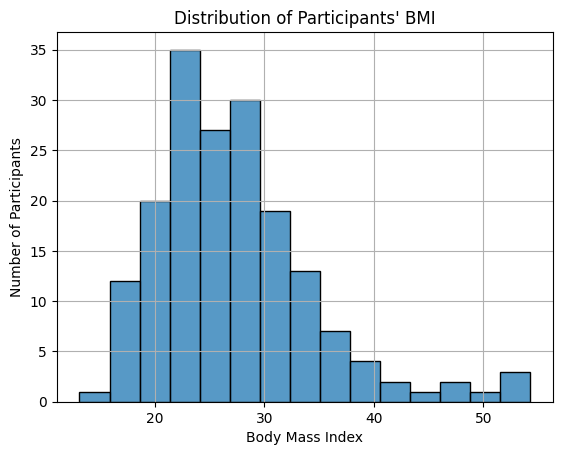

New Features from Blood Pressure Data: Index(['user_code', 'measurement_datetime', 'diastolic', 'systolic',
       'functional_changes_index', 'circulatory_efficiency',
       'kerdo_vegetation_index', 'robinson_index', 'wide_pulse_pressure'],
      dtype='object')


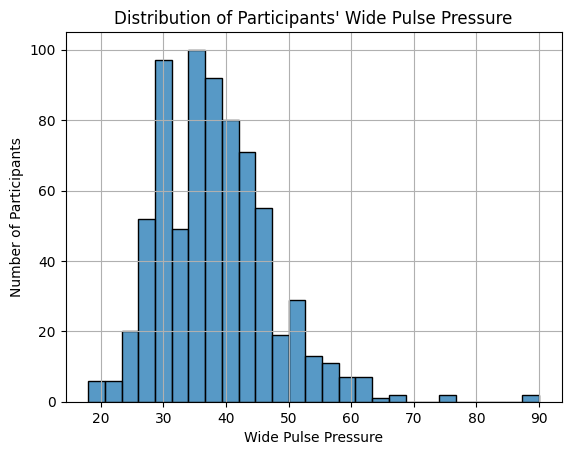

In [198]:
# Feature Engineering
print("\nFeature Engineering")
print("-------------------")

# Create a new feature from Participant Data: Body Mass Index (BMI) for each participant: BMI = Weight in kg / (Height in cm)**2
df_participants["bmi"] = df_participants["weight"]/(df_participants["height"]/100)**2
print(f"New Features from Participants' Generic Personal Data: {df_participants.columns}")

# Visualize new feature
sns.histplot(data=df_participants, x="bmi")
plt.title("Distribution of Participants' BMI")
plt.xlabel("Body Mass Index")
plt.ylabel("Number of Participants")
plt.grid(True)
plt.show()

# Create a new feature from Blood Pressure Data: Wide Pulse Pressure = Systolic Pressure - Diastolic Pressure
df_blood_pressure["wide_pulse_pressure"] = df_blood_pressure["systolic"] - df_blood_pressure["diastolic"]
print(f"New Features from Blood Pressure Data: {df_blood_pressure.columns}")

# Visualize new feature
sns.histplot(data=df_blood_pressure, x="wide_pulse_pressure")
plt.title("Distribution of Participants' Wide Pulse Pressure")
plt.xlabel("Wide Pulse Pressure")
plt.ylabel("Number of Participants")
plt.grid(True)
plt.show()

#### **Interpretation of New Features**

**First Feature: BMI**<br>
BMI = Weight in kg / (Height in cm)**2<br>
Lower BMI below standard indicates underweight, while the opposite indicates overweight.<br>
Based on the histogram, BMI of majority of participants ranges from 20 to 3x<br>

**Second Feature: Wide Pulse Pressure**<br>
Wide Pulse Pressure = Systolic Pressure - Diastolic Pressure<br>
According to the histogram, wide pulse pressure of majority of participants ranges from 2x to 5x. However, there are some outliers (70-90).<br>
Wider pulse pressures can indicate health-related problems either now or in the future.<br>
***

#### **7. Perform a dimensionality reduction method on the data and discuss**

With reference to the previous discussion on skewness and kurtosis, there are several features that may possibly be Gaussian-like.<br>
- Participants' Generic Personal Data: weight
- Blood Pressure: systolic, functional_changes_index, kerdo_vegetation_index
- Heart Rate: heart_rate
- HRV Measurements: bpm, meanrr, mode, amo
- Sleep Data: sleep_duration, sleep_rem_duration, sleep_light_duration, sleep_deep_duration 
- Wearables Data: resting_pulse, pulse_average, pulse_min, pulse_max, average_spo2_value, body_temperature_avg, stand_hours_total, active_calories_burned, basal_calories_burned, average_headphone_exposure<br>

As there is only one feature in Personal Data and Heart Rate that are Gaussian-like, we cannot perform dimensionality reduction on these two dataframes.<br>

For Blood Pressure Data, the three Gaussian-like features do not have high correlation.<br>

For Sleep Data, sleep_rem_duration, sleep_light_duration, sleep_deep_duration came from only 3 users, so they may actually not be Gaussian-like.<br>

For Wearables Data, out of all Gaussian-like features, only resting_pulse <> pulse_min has high correlation (>0.80).<br>

For HRV Measurements, out of the four Gaussian-like features, mode <> meanrr has high positive correlation (>0.80), 
while bpm <> meanrr, bpm <> mode have high negative correlation (<-0.80)<br>

So here, we will perform PCA dimensionality reduction on HRV Measurements, with bpm, meanrr, and mode, and get two principal components after the reduction.<br>

In [199]:
# Dimensionality Reduction
print("\nDimensionality Reduction")
print("-------------------")

print("\nPerform PCA on bpm, meanrr, mode, from HRV Measurements Data, with two principal components after the reduction")
print("\nHRV Measurements Data: Before PCA")
print(df_hrv_measurements_z.head(10))

print("\nHRV Measurements Data: Mean and Standard Deviation before PCA (after Z-Score Reduction)")
print(df_hrv_measurements_z.describe().loc[['mean', 'std']])
print("\nSkewness:")
print(df_hrv_measurements_z.skew())
print("\nKurtosis:")
print(df_hrv_measurements_z.kurt())


pca = PCA(n_components = 2)
pca.fit(df_hrv_measurements_z)
df_hrv_measurements_z_pca = pca.transform(df_hrv_measurements_z)
df_hrv_measurements_z_pca = pd.DataFrame(df_hrv_measurements_z_pca,columns=["PC1", "PC2"])

print("\nHRV Measurements Data: After PCA")
print(df_hrv_measurements_z_pca.head(10))

print("\nHRV Measurements Data: Mean and Standard Deviation after PCA")
print(df_hrv_measurements_z_pca.describe().loc[['mean', 'std']])
print("\nSkewness:")
print(df_hrv_measurements_z_pca.skew())
print("\nKurtosis:")
print(df_hrv_measurements_z_pca.kurt())


Dimensionality Reduction
-------------------

Perform PCA on bpm, meanrr, mode, from HRV Measurements Data, with two principal components after the reduction

HRV Measurements Data: Before PCA
        bpm    meanrr      mode
0  0.142779 -0.318005 -0.431482
1 -0.267020  0.133893  0.259272
2  0.798459 -0.840489 -0.776859
3  0.142779 -0.268958 -0.086105
4  0.388659 -0.520522 -0.431482
5 -0.348980  0.147792  0.259272
6 -0.021140 -0.120509 -0.086105
7 -0.021140 -0.185128 -0.086105
8  0.880419 -0.912749 -0.776859
9 -0.430940  0.298061  0.259272

HRV Measurements Data: Mean and Standard Deviation before PCA (after Z-Score Reduction)
               bpm        meanrr          mode
mean -2.802757e-16  2.189654e-16  2.802757e-16
std   1.000000e+00  1.000000e+00  1.000000e+00

Skewness:
bpm       0.482403
meanrr    0.334116
mode      0.387824
dtype: float64

Kurtosis:
bpm       0.047671
meanrr   -0.152961
mode     -0.262343
dtype: float64

HRV Measurements Data: After PCA
        PC1       PC2
0 

#### **Interpretation of Dimensionality Reduction**

After applying PCA successfully, we can reduce from original three selected Gaussian-like features (bpm, meanrr, mode) and get two resulting principal components (PC1 and PC2), with mean of 0, and standard deviation of 1.72 and 0.21 respectively. Note that the resulting standard deviations are not unit variance so we should perform Z-Score standardization again on the resulting data before it can be used in other processes. There should be some information loss after the reduction.<br>
***

#### **8. Include a discussion around data quality assessment, including data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance**

**Data Profiling:**<br>
This Covid-19 and wearables data was collected in 2020 by Welltory team from participants with positive Covid-19. It comprises of health conditions of participants, including blood pressure, heart rate, HRV measurement, sleep data, wearables data, survey of symptoms, plus weather condition and participants' generic personal data.<br>

Data contains distinct user_code, date/time of measurement, various biometric measurements in integer or float, and the rest are text. Some are survey results, which are assigned discrete values in specific ranges.<br>

There are some measurements that are likely to be Gaussian-like based on kurtosis and skewness, but Normality tests should be performed first before conclusion.<br>

There are a lot of missing values, mostly biometric measurements. This may result from the limited availability and functionality of the devices used by participants, or different frequency of measurements.<br>

With IQR method, we found large number of outliers, however, as these outlier are mostly biometric data, and some may be true outliers. Before removing these outliers, we should seek advice from healthcare expert.<br>

**Data Completeness:**<br>
We found some missing values that we may be able to handle. These missings are<br>

**Personal Data:**<br> 
- "country" & "height" > drop rows without "country" & "height"
- "city" > drop column
- "symptoms_onset" > fill in with the date 1/1/1500 and add a new feature "missing_symptoms_onset" (flag = 1 if symptoms_onset missing, otherwise 0)<br>

**Sleep Data:**<br>
- "sleep_awake_duration", "sleep_rem_duration", "sleep_light_duration", "sleep_deep_duration", "pulse_min", "pulse_max", "pulse_average" > drop columns<br>

**Wearables Data:**<br>
Remove the observation without "basal_calories_burned"/"total_calories_burned"<br>

**Data Accuracy:**<br>
We have not done a cross-check a sample of records.<br>

**Data Consistency:**<br>
Based on most frequent values, there is no potential inconsistencies or anomalies.<br>

**Data Integrity:**<br>
user_code are unique, and biometric data seems to be in line with normal biometric data of this kind.<br>

**Data Lineage and Provenance:**<br>
This Covid-19 and wearables data was collected in 2020 by Welltory team from participants with positive Covid-19. The team uses multiple devices for data collection, such as bluetooth-enabled heart rate monitor, smart phone camera, Apple Watch, and Garmin.<br>

We have applied Z-Score standardization on some features of HRV Measurements, removed outliers with IQR method, and performed PCA dimensionality reduction on them. We have created two new features, BMI and Wide Pulse Pressure from Personal Data and Blood Pressure Data respectively.<br>